In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [24]:
data_set_names = ['ArthurWaley','BartMarshall','JohnCHWu','LinYutang']
data_sets = []

for data_set_name in data_set_names:
    data_sets.append(pd.read_csv(f'Data/{data_set_name}_with_predictions.csv', sep='|'))
    # drop 'Official report' column
    data_sets[-1].drop(columns=['Official report'], inplace=True)


sentiment_labels = ['Optimistic','Thankful','Empathetic','Pessimistic','Anxious','Sad','Annoyed','Denial','Surprise','Joking']

data_sets[3].head(10)

Text  Chapter  Optimistic  \
0                       The Tao the can be told of        1         1.0   
1                         Is not the Absolute Tao;        1         0.0   
2                      The Names that can be given        1         0.0   
3                          Are not Absolute Names.        1         0.0   
4  The Nameless is the origin of Heaven and Earth;        1         0.0   
5           The Named is the Mother of All Things.        1         1.0   
6                                       Therefore:        1         0.0   
7        Oftentimes, one strips oneself of passion        1         0.0   
8              In order to see the Secret of Life;        1         1.0   
9       Oftentimes, one regards life with passion,        1         0.0   

   Thankful  Empathetic  Pessimistic  Anxious  Sad  Annoyed  Denial  Surprise  \
0       0.0         0.0          0.0      0.0  0.0      0.0     0.0       0.0   
1       0.0         0.0          1.0      0.0  0.0      1.0     1.0       1.0   
2       0.0         0.0          0.0      0.0  0.0      0.0     0.0       1.0   
3       0.0         0.0          0.0      0.0  0.0      0.0     0.0       1.0   
4       0.0         0.0          0.0      0.0  0.0      0.0     0.0       1.0   
5       0.0         0.0          0.0      0.0  0.0      0.0     0.0       0.0   
6       0.0         0.0          0.0      0.0  0.0      0.0     0.0       0.0   
7       0.0         0.0          0.0      0.0  0.0      0.0     0.0       0.0   
8       0.0         0.0          0.0      0.0  0.0      0.0     0.0       0.0   
9       0.0         0.0          0.0      0.0  0.0      0.0     0.0       0.0   

   Joking  
0     1.0  
1     0.0  
2     1.0  
3     0.0  
4     0.0  
5     1.0  
6     0.0  
7     1.0  
8     0.0  
9     1.0

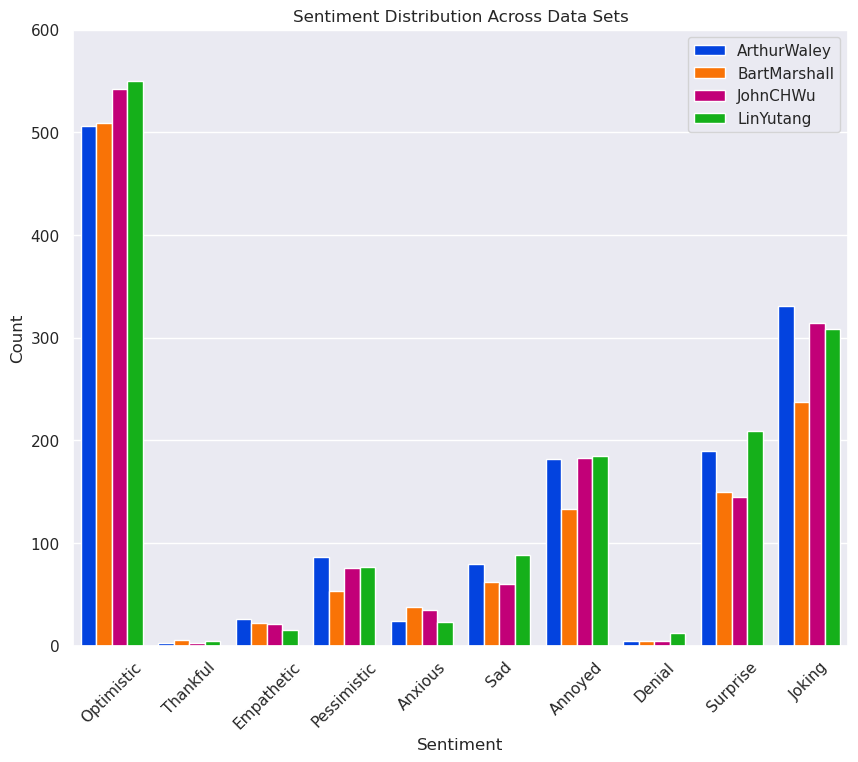

In [27]:
#for label in sentiment_labels:
#    for data_set_name, data_set in zip(data_set_names, data_sets):
        #print(f'{data_set_name} {label}: {data_set[label].sum()}')


# set the x-axis label and tick labels
x_label = 'Sentiment'
x_tick_labels = sentiment_labels

# set the y-axis label
y_label = 'Count'

# set the color palette
colors = ["blue", "orange", "magenta", "green"]
myPalette = sns.xkcd_palette(colors)

# create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# set the position and width of the bars
bar_width = 0.2
bar_positions = np.arange(len(sentiment_labels))
bar_offsets = [-0.3, -0.1, 0.1, 0.3]

# plot the bars for each data set
for i in range(len(data_set_names)):
    data_set_name = data_set_names[i]
    data_set = data_sets[i]

    bar_values = data_set[sentiment_labels].sum()
    ax.bar(bar_positions + bar_offsets[i], bar_values, bar_width, color=myPalette[i], label=data_set_name)

# set the x-axis tick labels and tick positions
ax.set_xticks(bar_positions)
ax.set_xticklabels(x_tick_labels, rotation=45)

# add legend and axis labels
ax.legend(loc='best')
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.set_title('Sentiment Distribution Across Data Sets')

# adjust the spacing between bars and add grid lines
ax.set_axisbelow(True)
ax.yaxis.grid(True)
ax.xaxis.grid(False)
ax.set_xlim(-0.5, len(sentiment_labels) - 0.5)
ax.set_ylim(0, 600)

# display the plot
plt.show()

In [57]:
# set the x-axis label and tick labels
x_label = 'Sentiment'
x_tick_labels = sentiment_labels

# set the y-axis label
y_label = 'Count'

# set the color palette
colors = ["blue", "orange", "magenta", "green"]
myPalette = sns.xkcd_palette(colors)

# get the unique chapters
chapters = data_sets[0]['Chapter'].unique()

# create a figure and axes for each chapter
fig, axes = plt.subplots(nrows=9, ncols=9, figsize=(90, 90))

# plot the bars for each chapter
for i, chapter in enumerate(chapters):
    position = np.unravel_index(i, axes.shape)

    # set the title of the subplot
    axes[position].set_title(f'Chapter {chapter} Sentiment Distribution')

    # get the sentiment counts for each data set for this chapter
    data_set_sentiments = []
    for data_set in data_sets:
        data_set_sentiments.append(data_set[data_set["Chapter"] == chapter][sentiment_labels].sum().tolist())

    # set the position and width of the bars
    bar_width = 0.2
    bar_positions = np.arange(len(sentiment_labels))
    bar_offsets = [-0.3, -0.1, 0.1, 0.3]

    # plot the bars for each data set
    for j in range(len(data_set_names)):
        bar_values = data_set_sentiments[j]
        axes[position].bar(bar_positions + bar_offsets[j], bar_values, bar_width, color=myPalette[j], label=data_set_names[j])

    # set the x-axis tick labels and tick positions
    axes[position].set_xticks(bar_positions)
    axes[position].set_xticklabels(x_tick_labels, rotation=45)

    # add legend and axis labels
    axes[position].legend(loc='best')
    axes[position].set_xlabel(x_label)
    axes[position].set_ylabel(y_label)

    # adjust the spacing between bars and add grid lines
    axes[position].set_axisbelow(True)
    axes[position].yaxis.grid(True)
    axes[position].set_xlim(-0.5, len(sentiment_labels) - 0.5)
    axes[position].set_ylim(0, 25)

# adjust the spacing between subplots
fig.tight_layout()

# display the plot
plt.show()

#save the plot
fig.savefig('Plots/SentimentDistributionAcrossChapters.png', dpi=300)




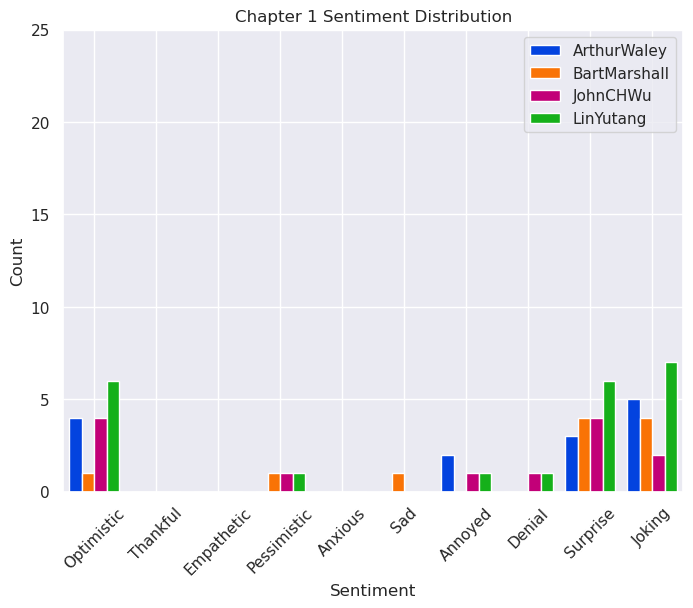

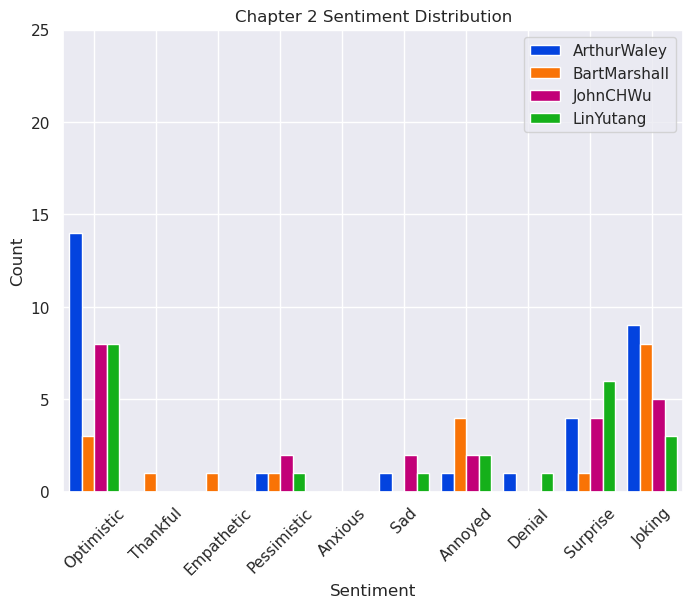

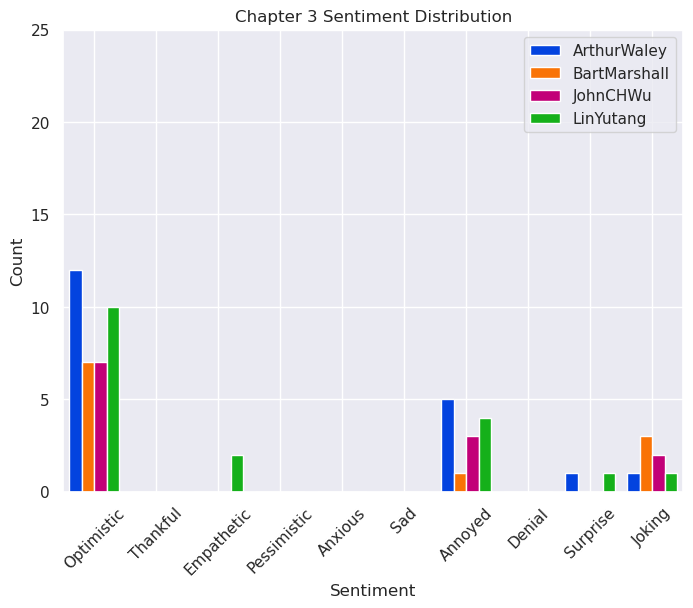

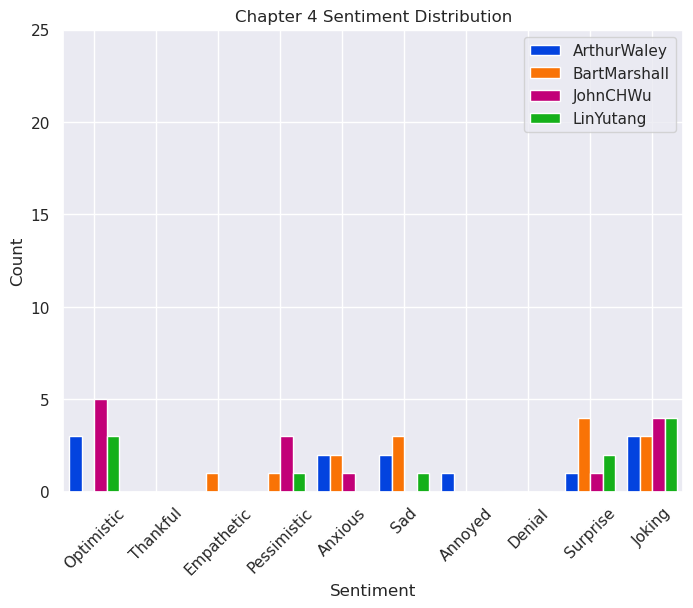

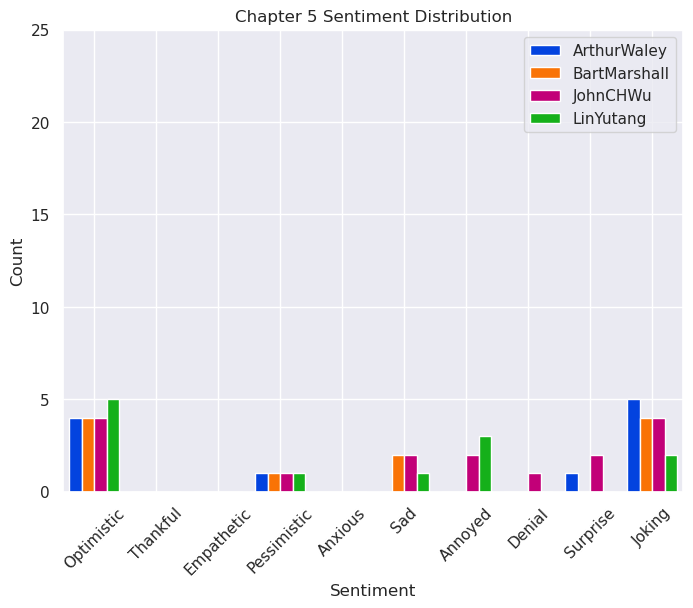

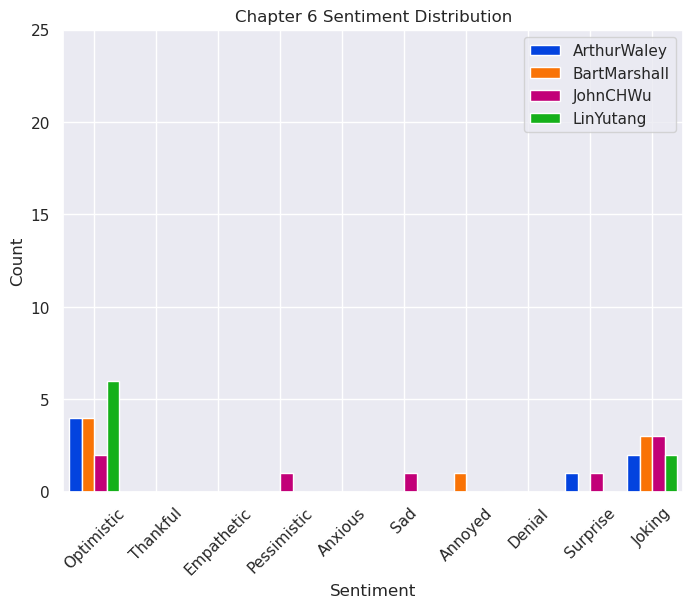

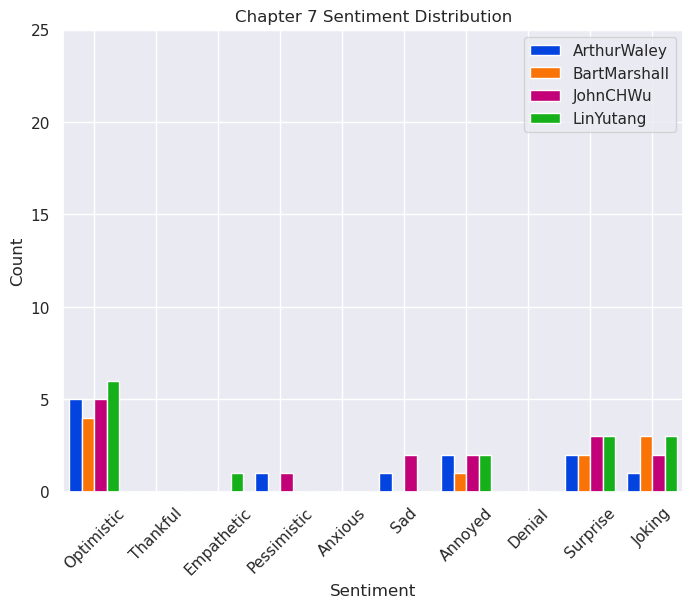

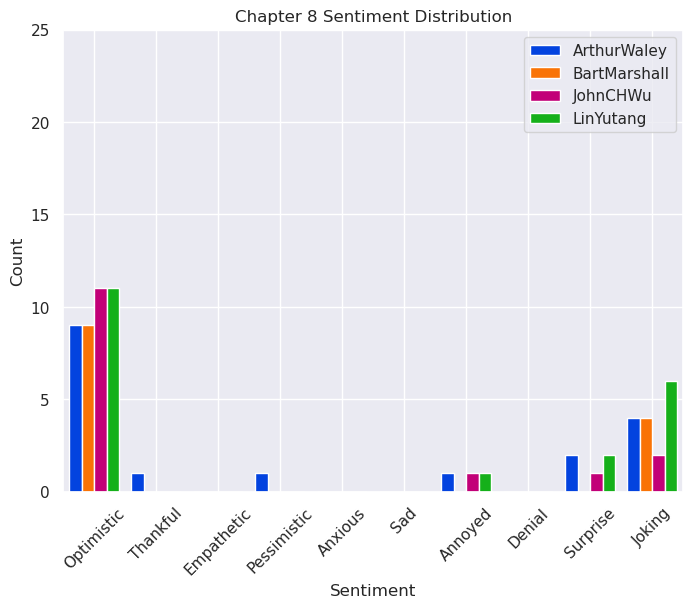

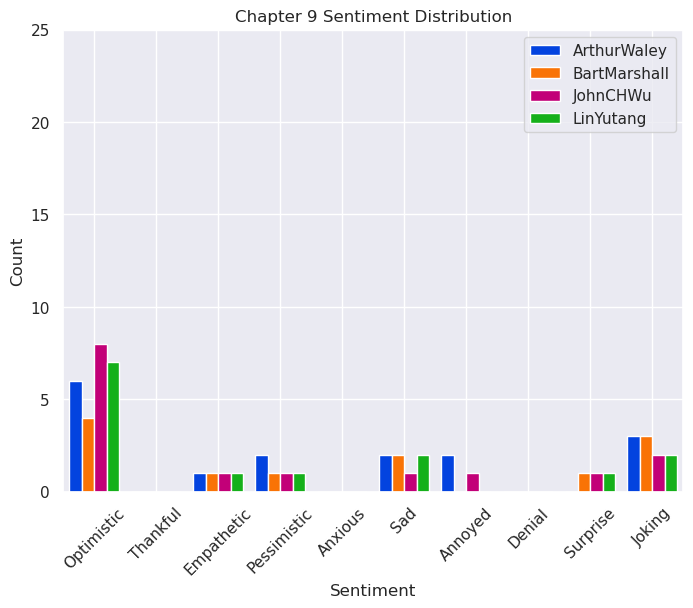

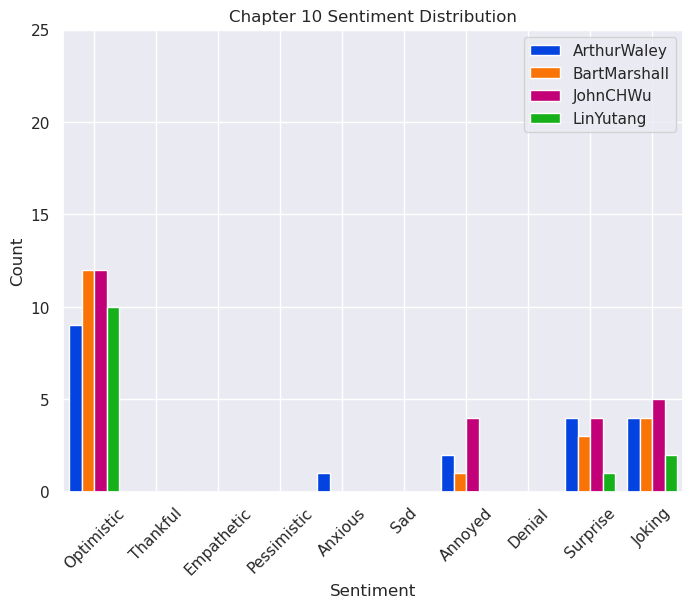

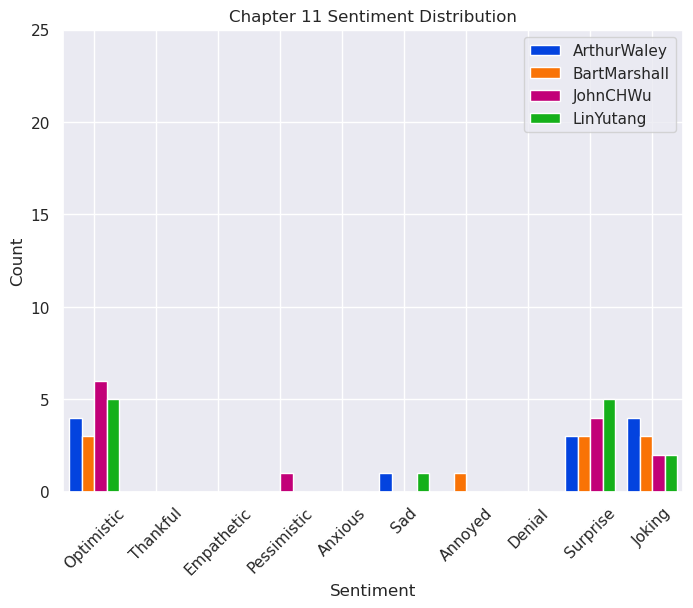

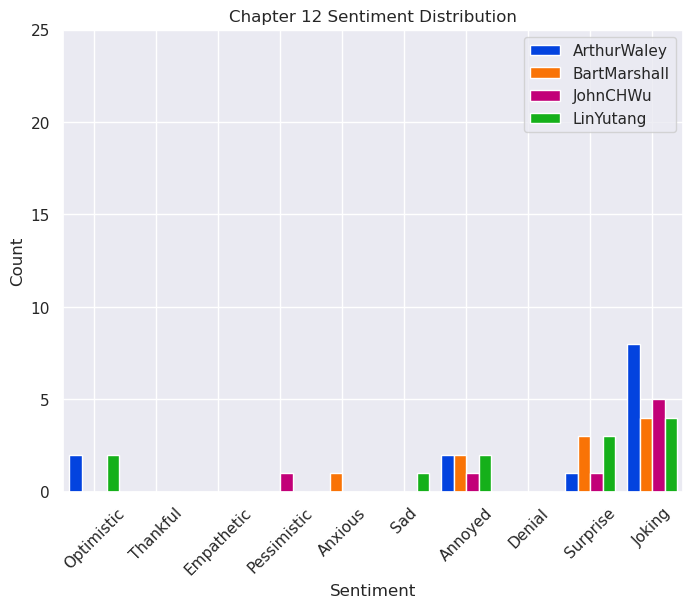

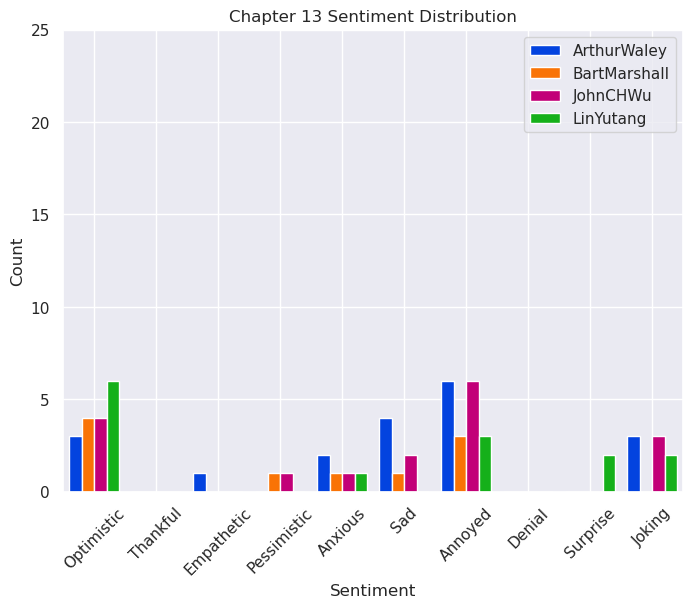

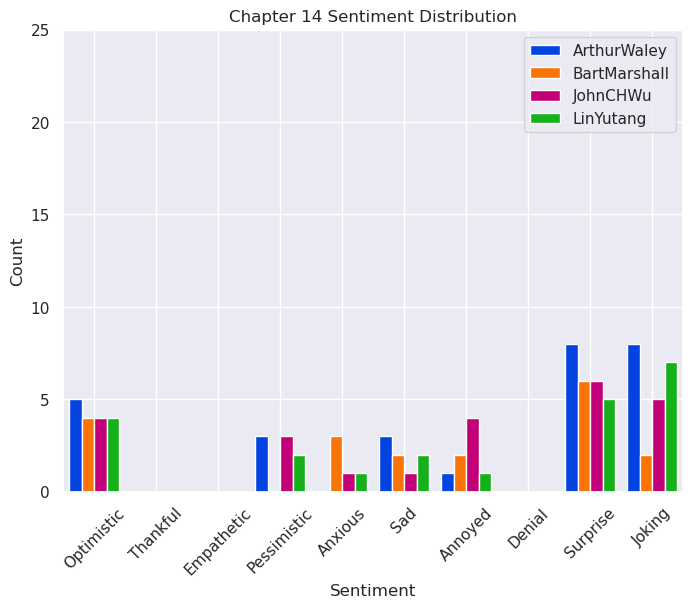

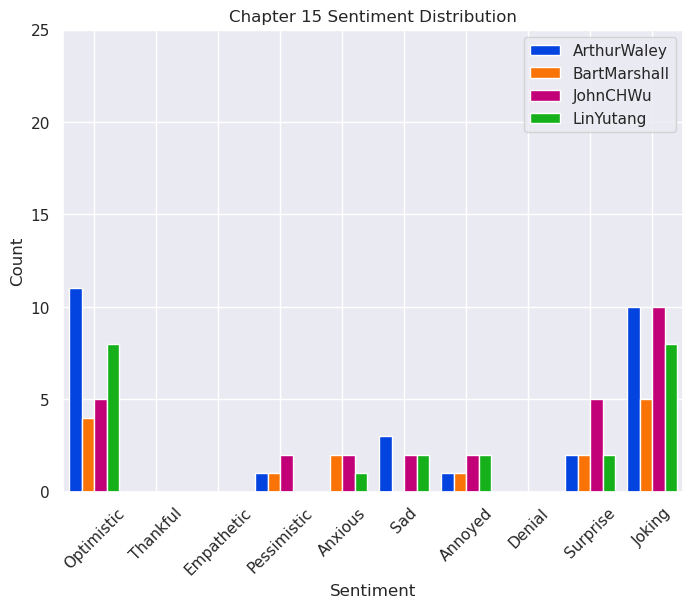

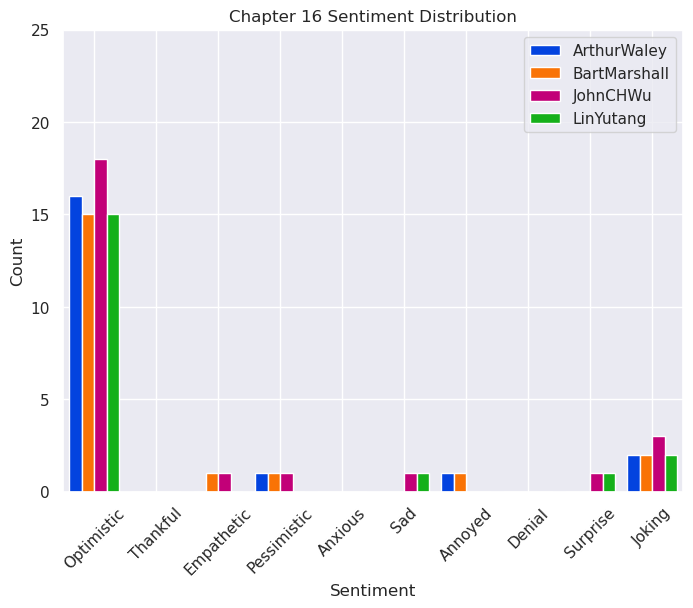

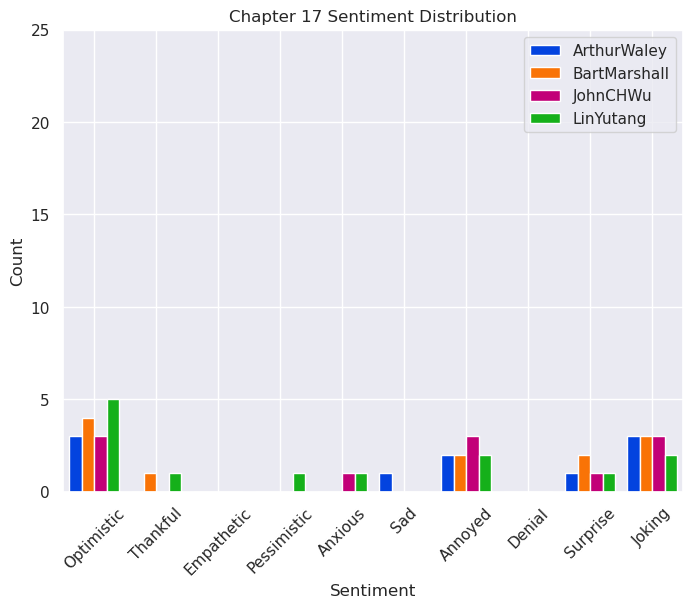

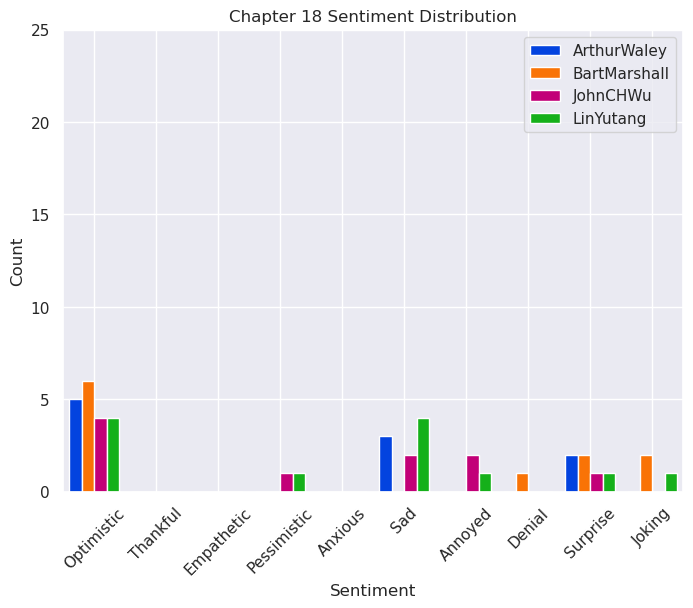

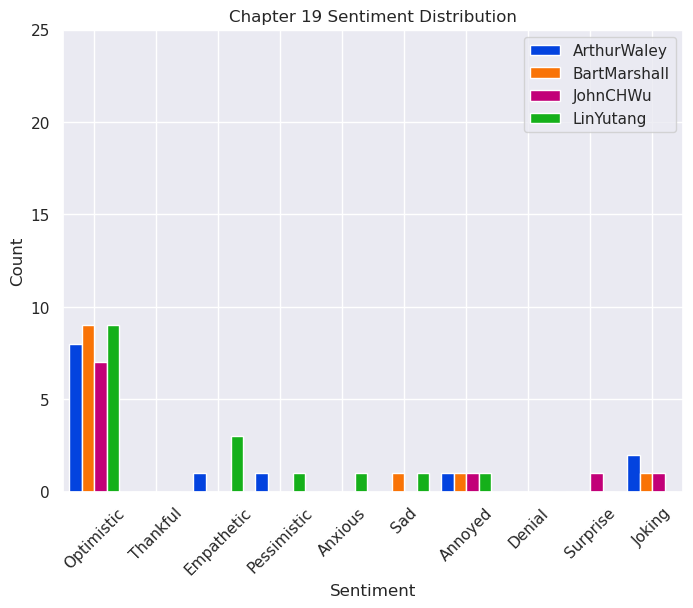

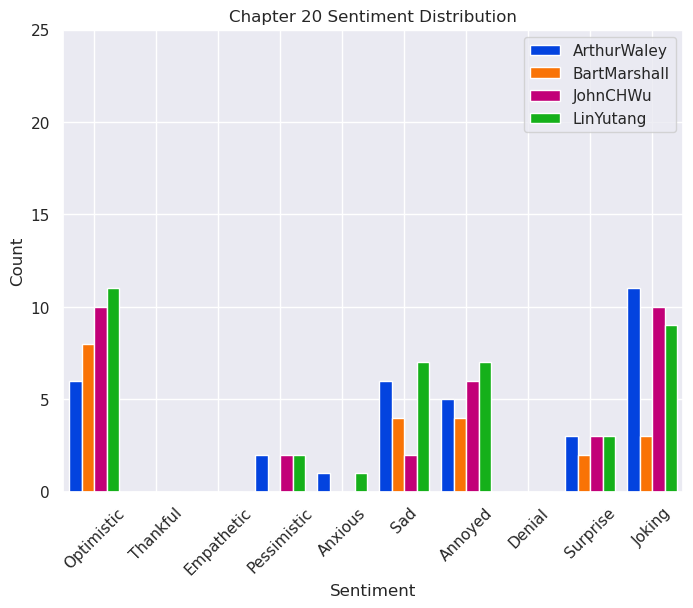

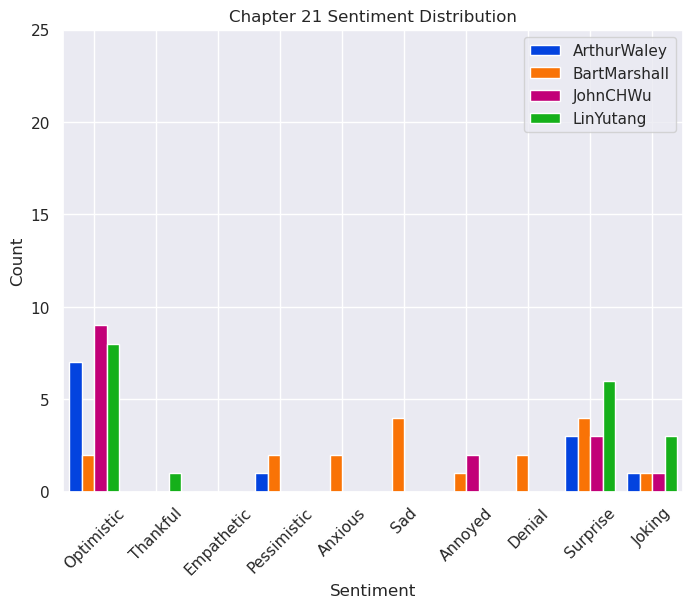

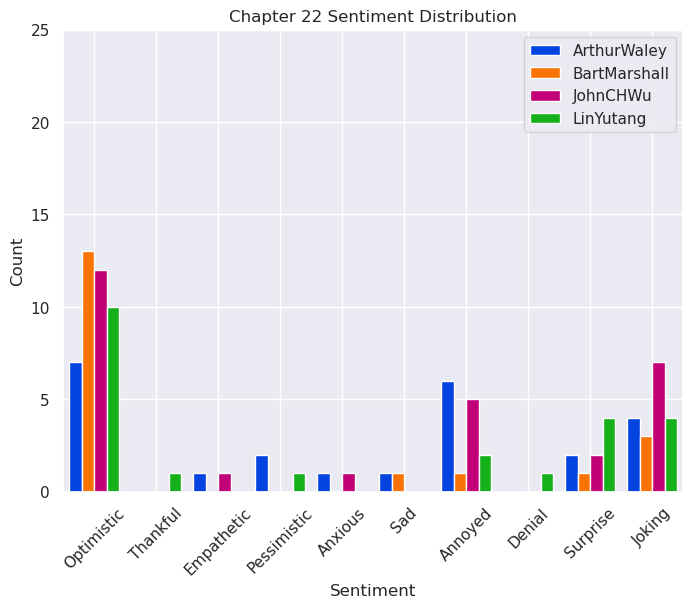

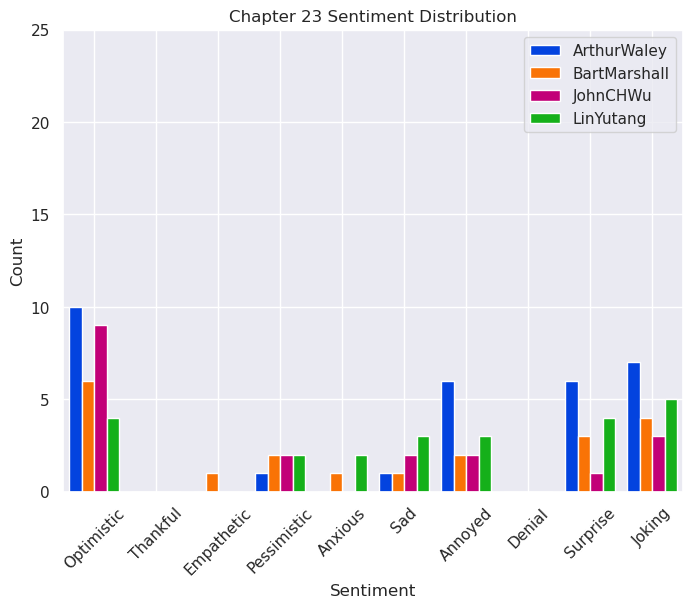

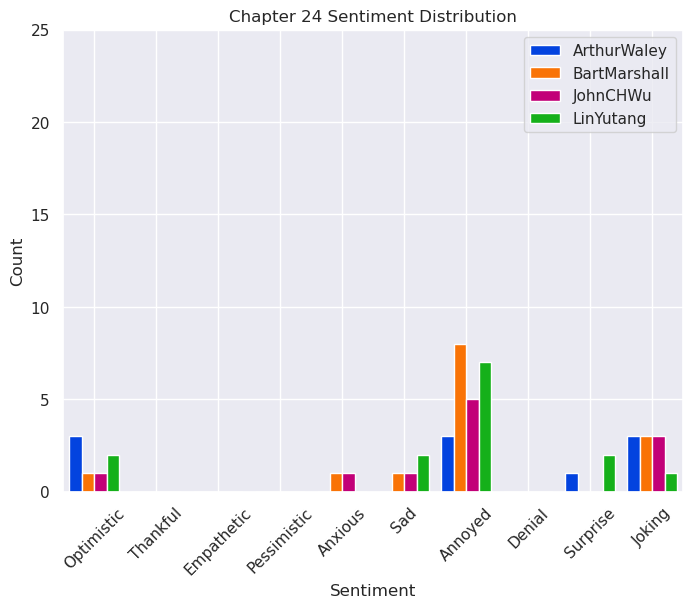

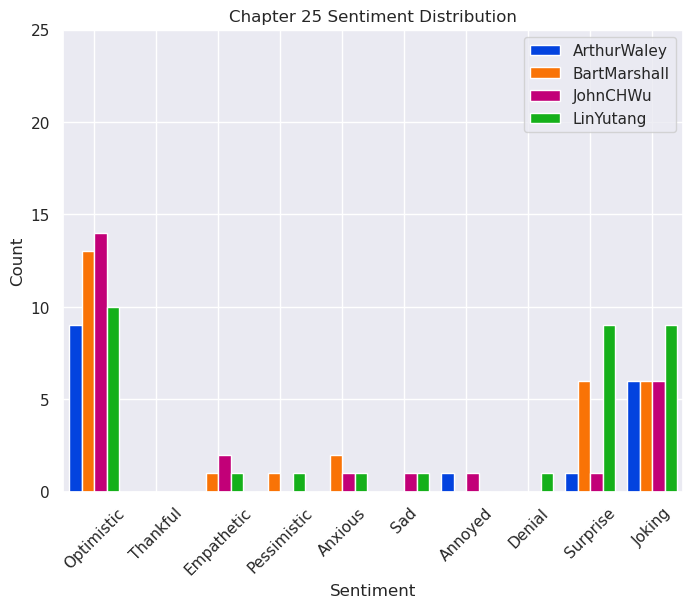

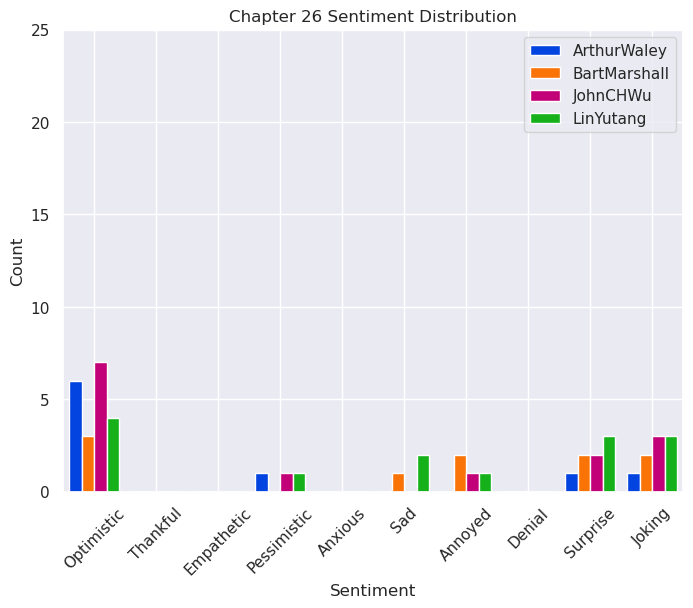

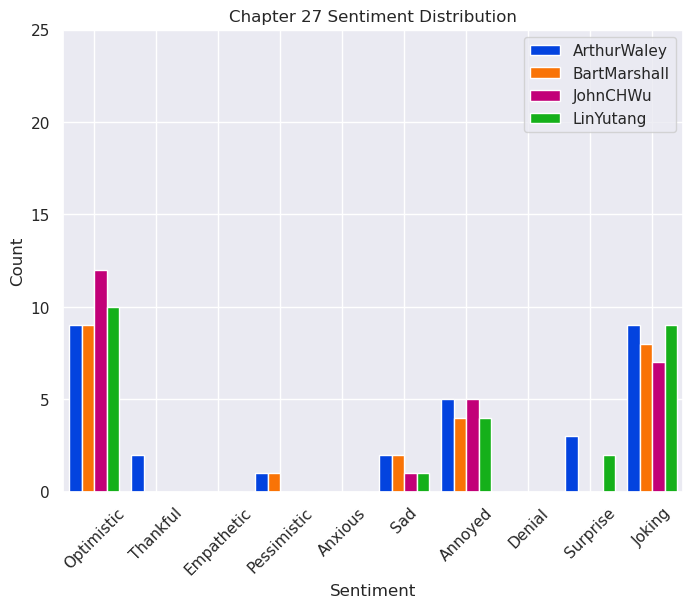

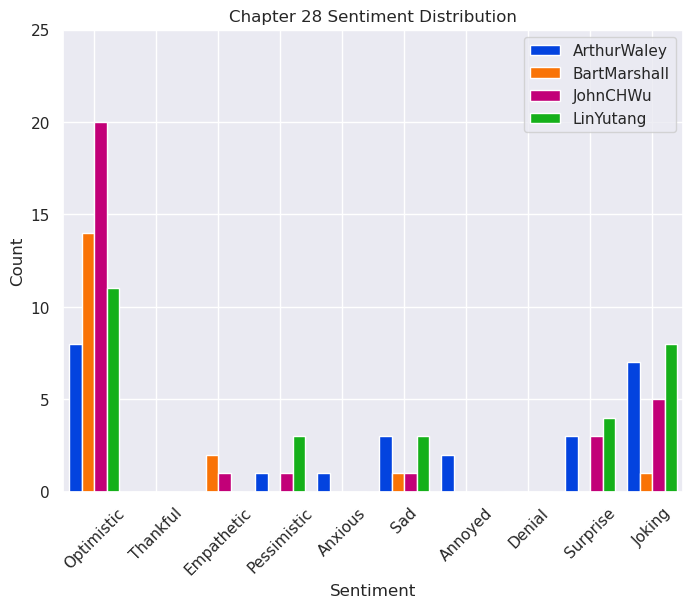

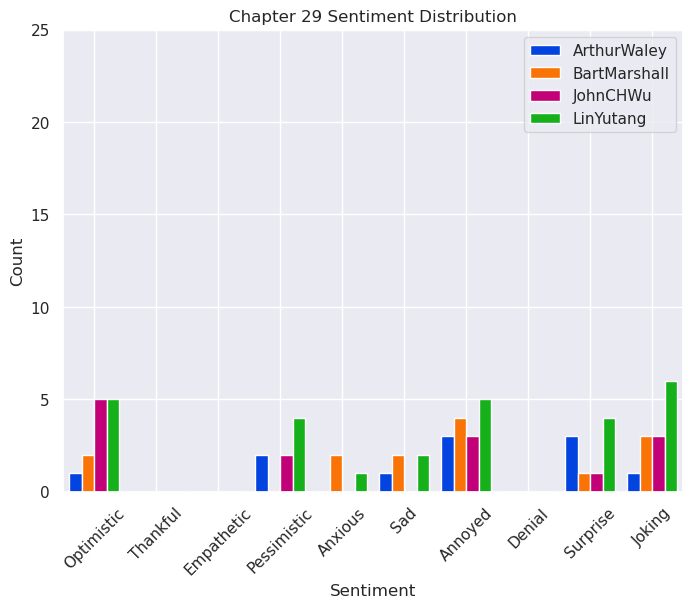

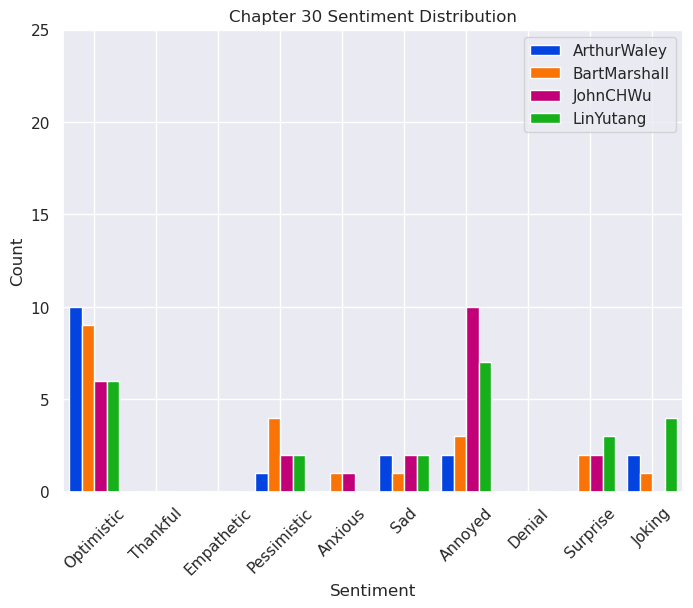

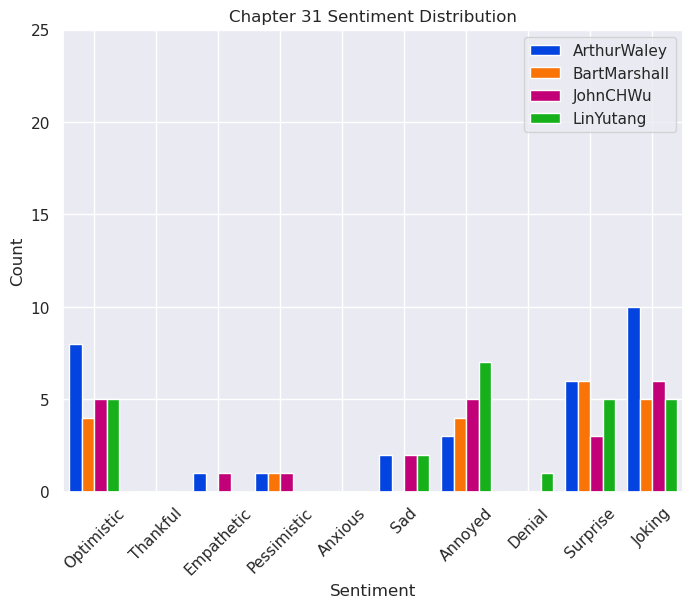

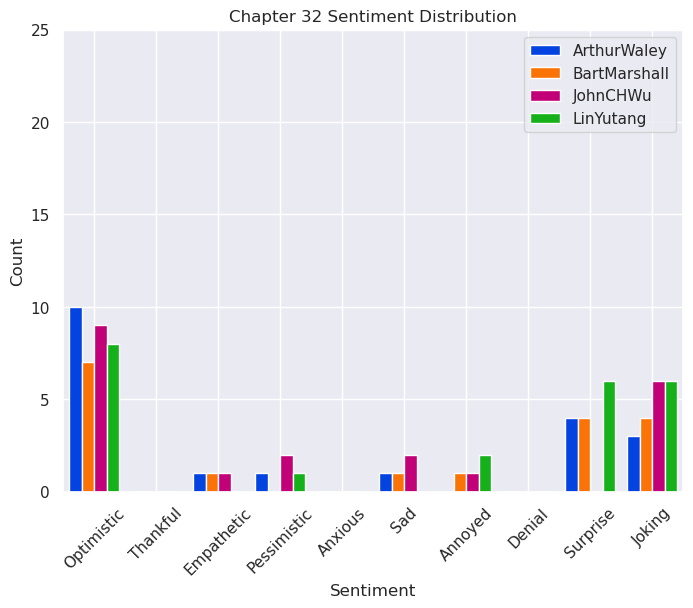

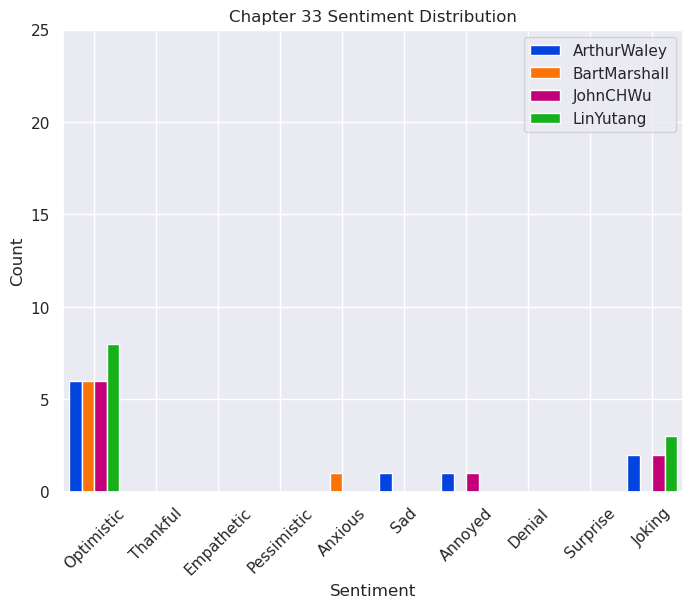

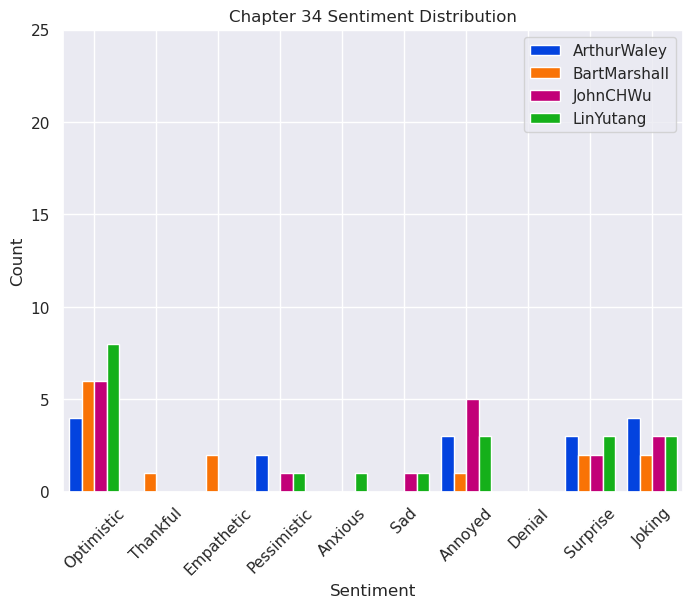

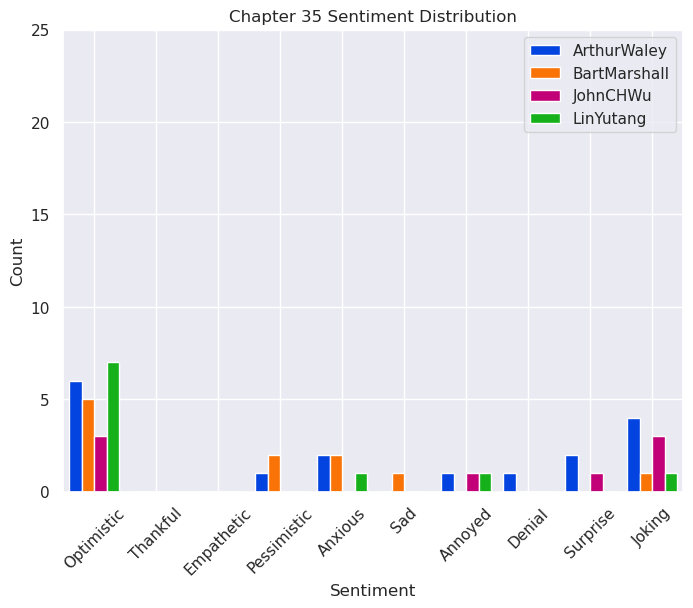

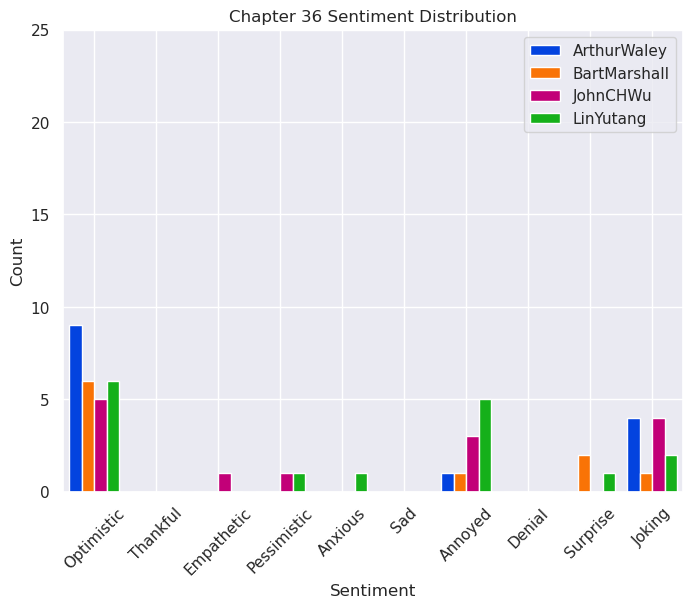

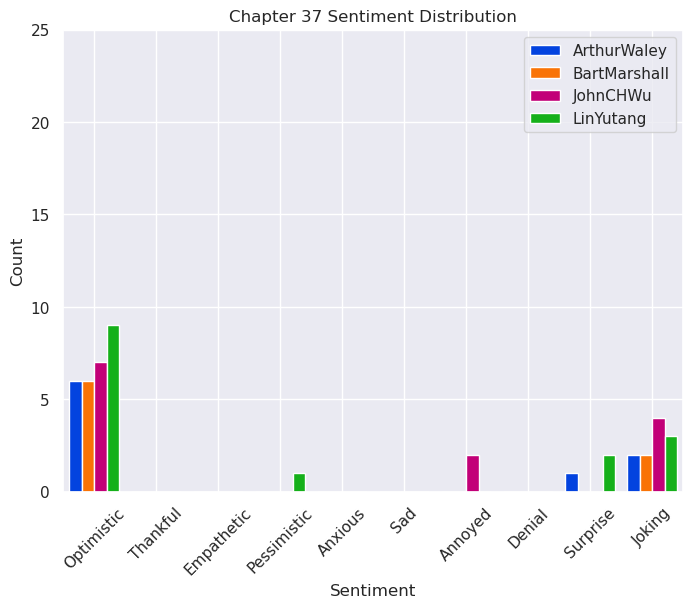

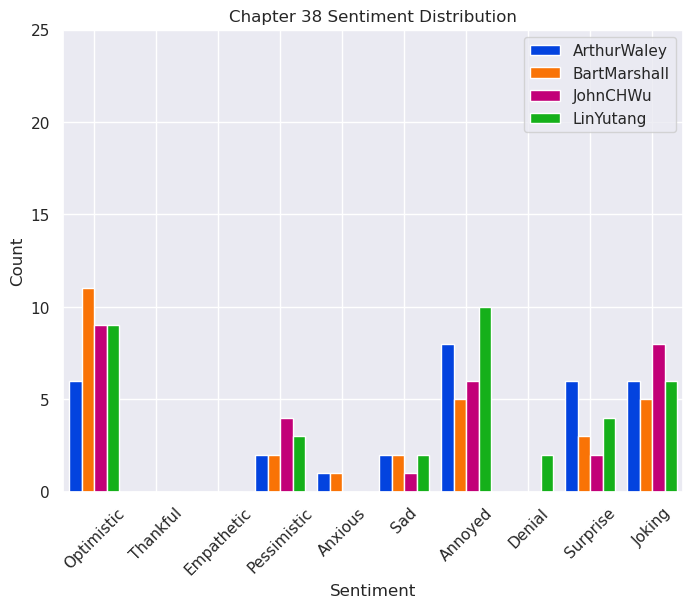

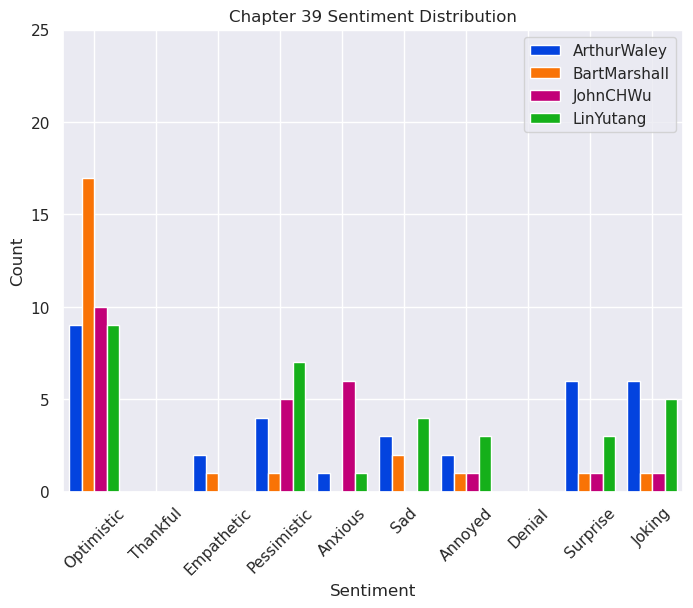

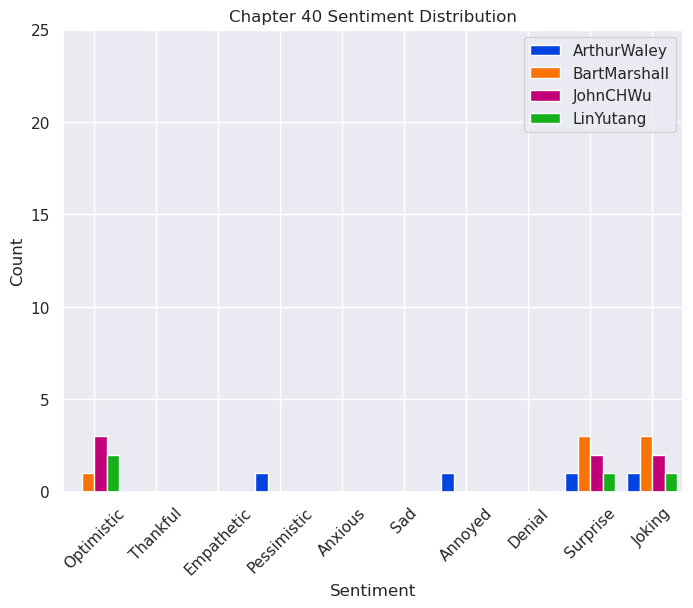

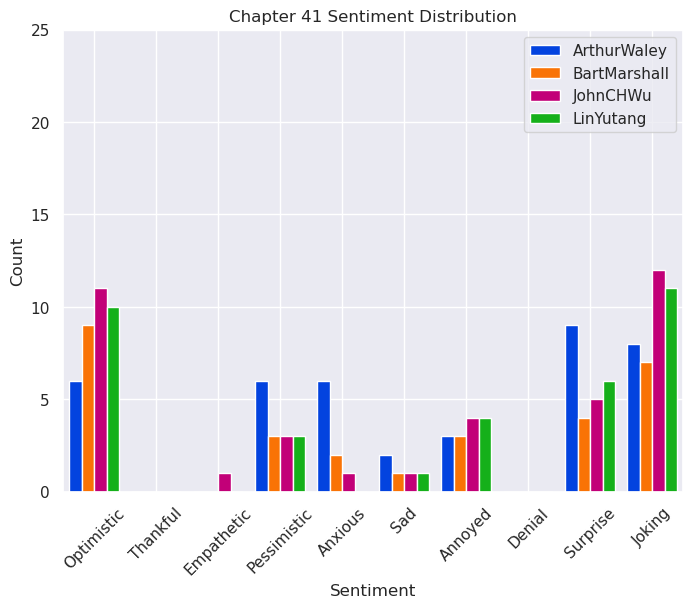

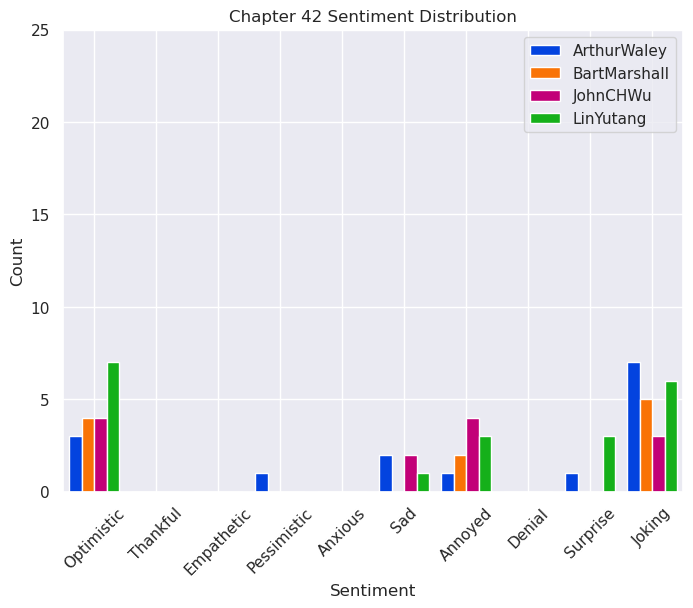

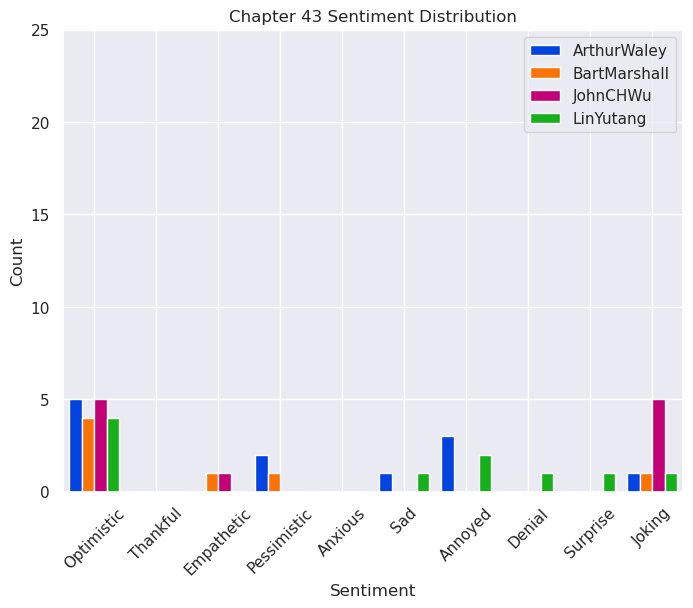

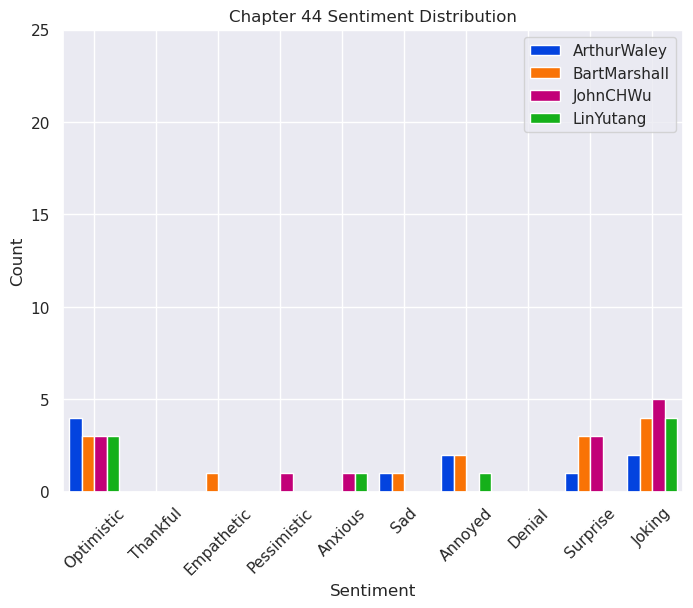

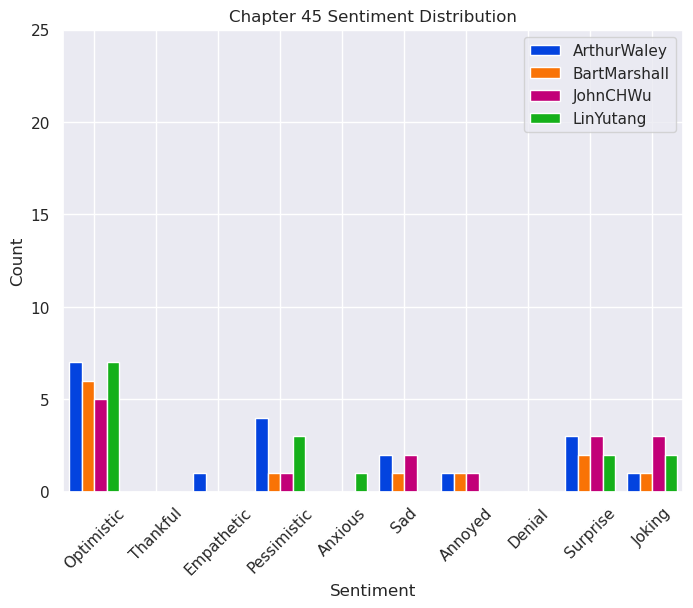

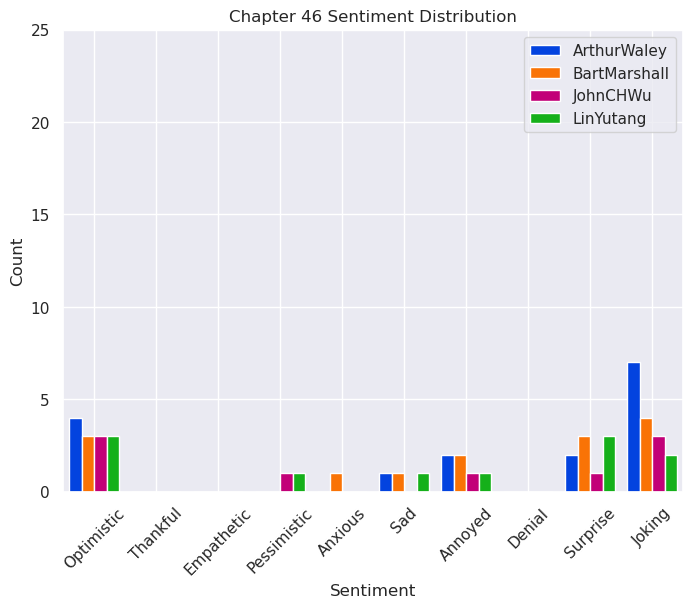

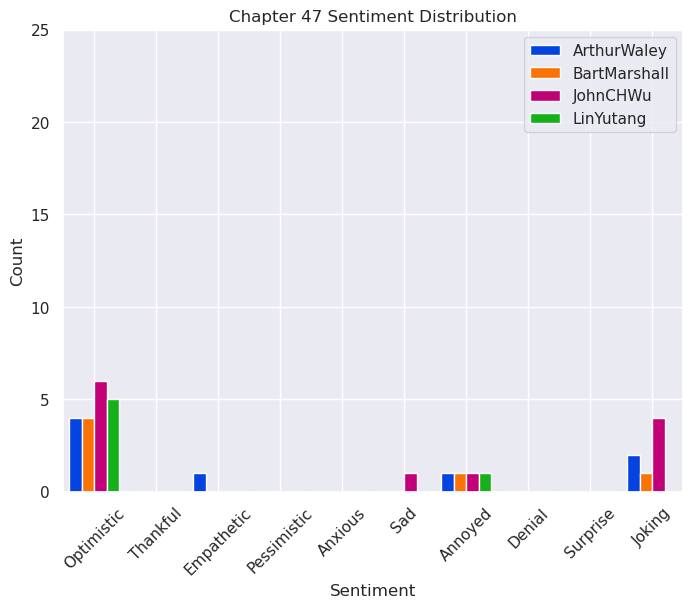

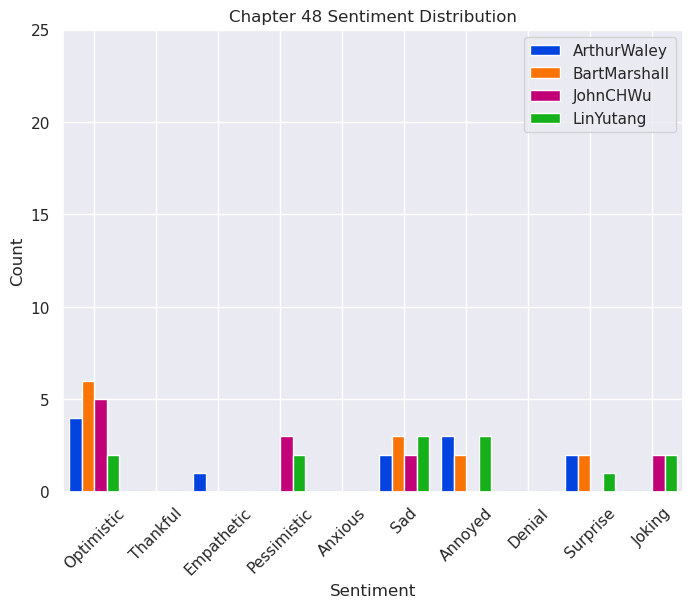

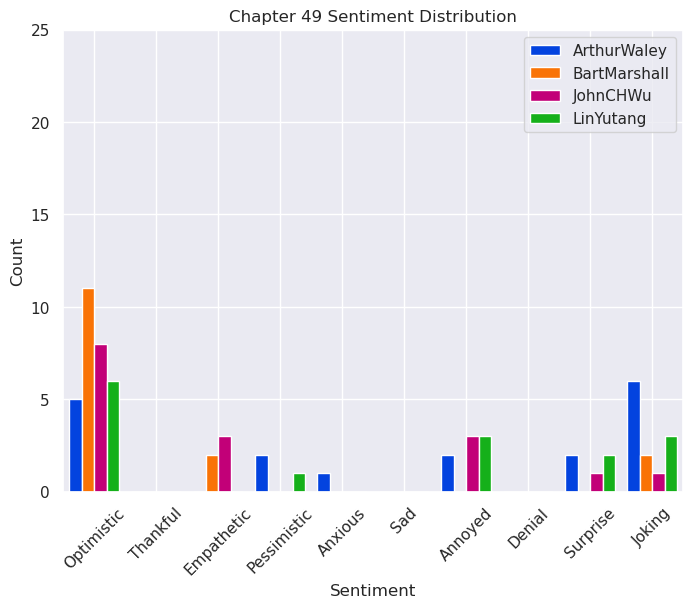

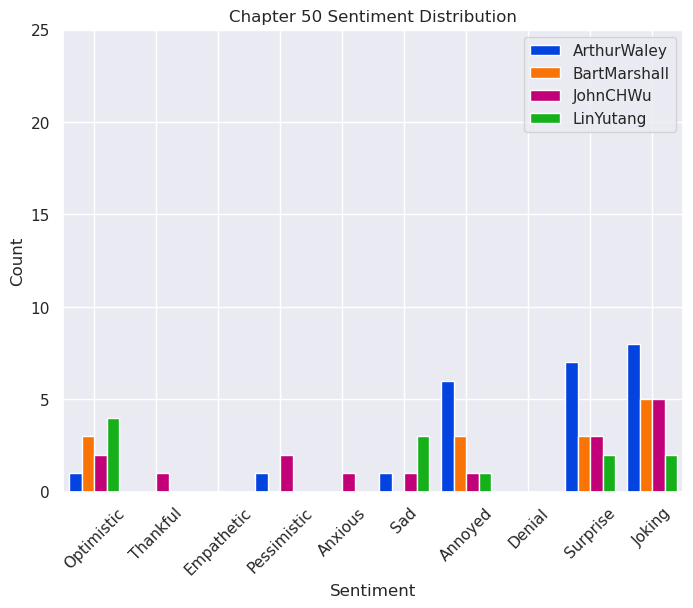

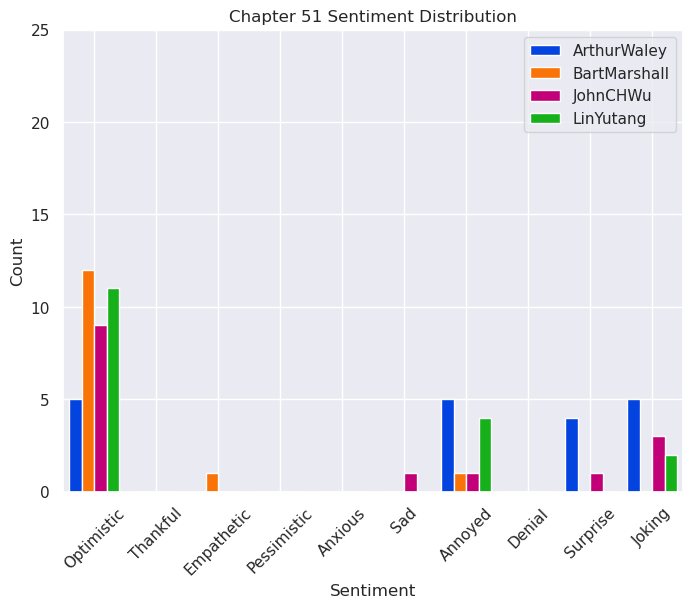

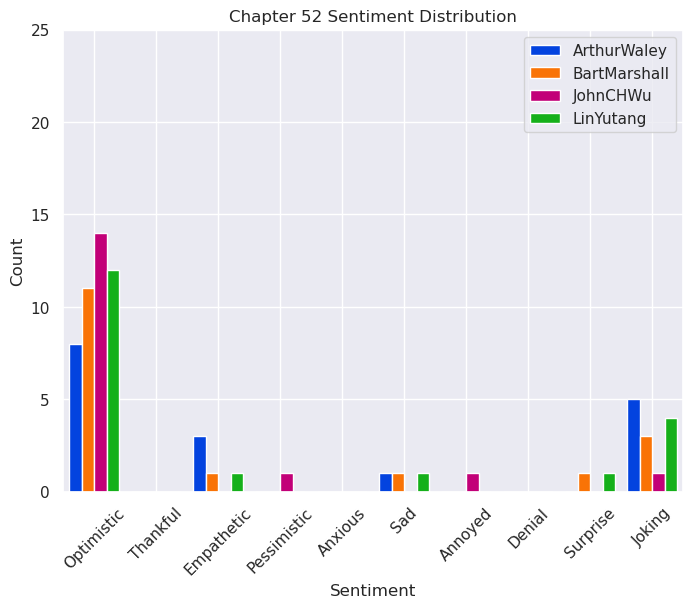

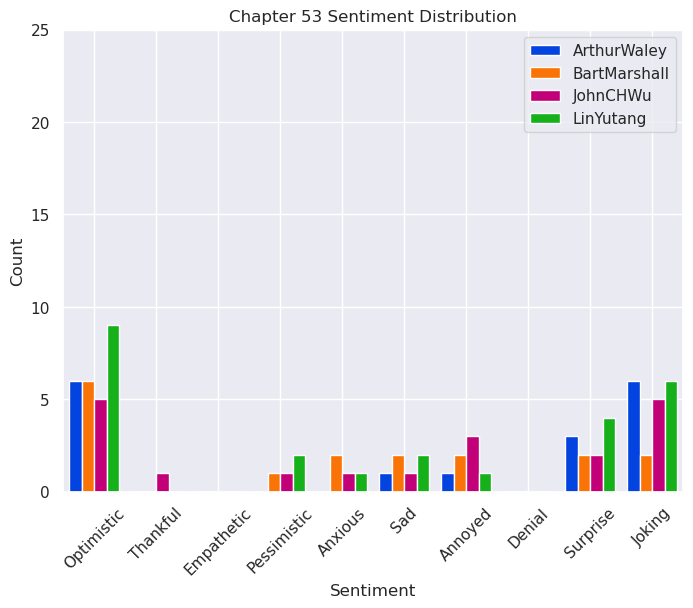

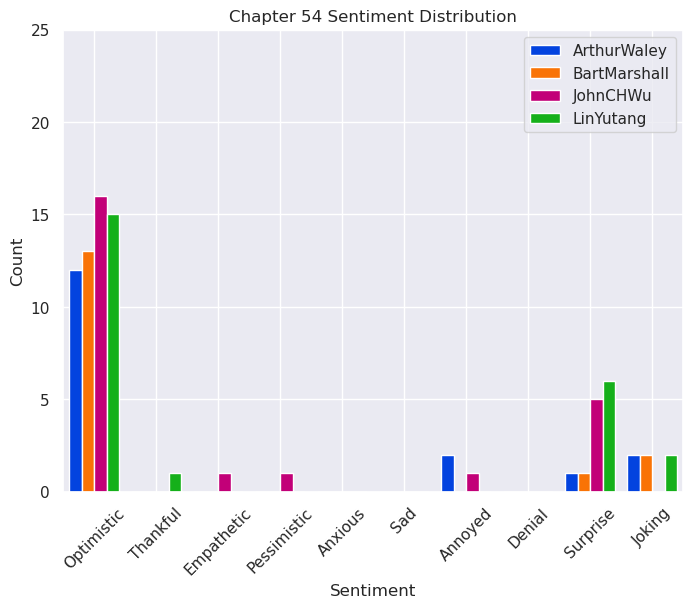

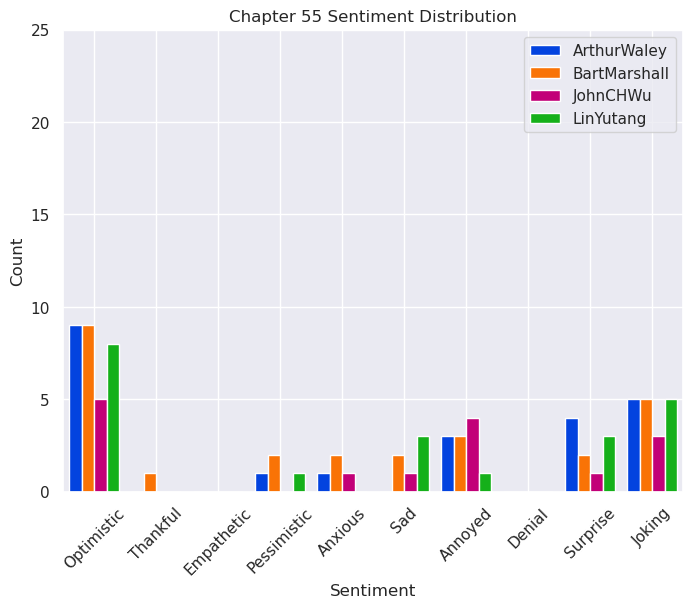

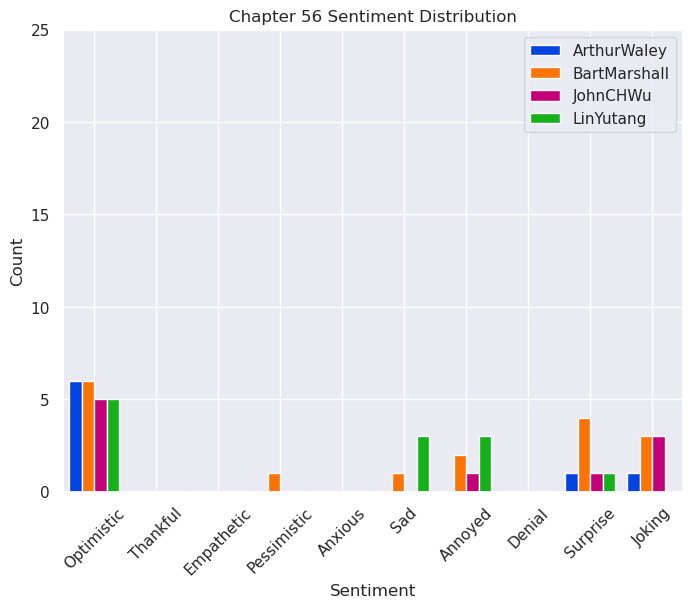

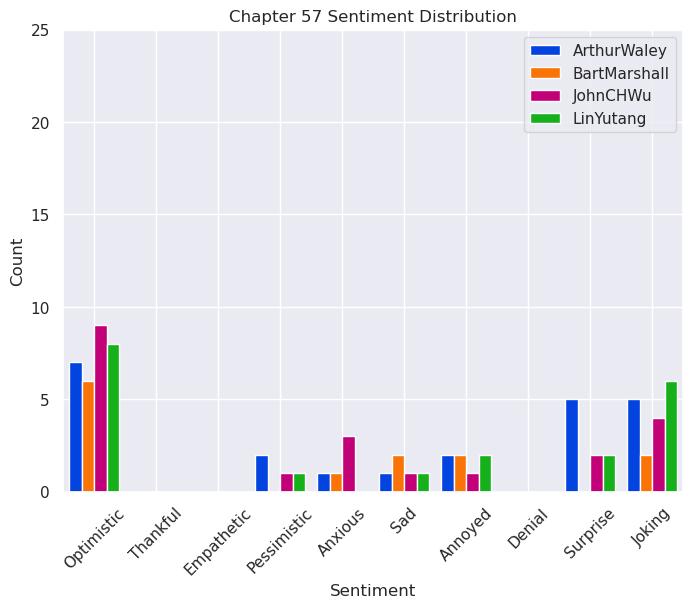

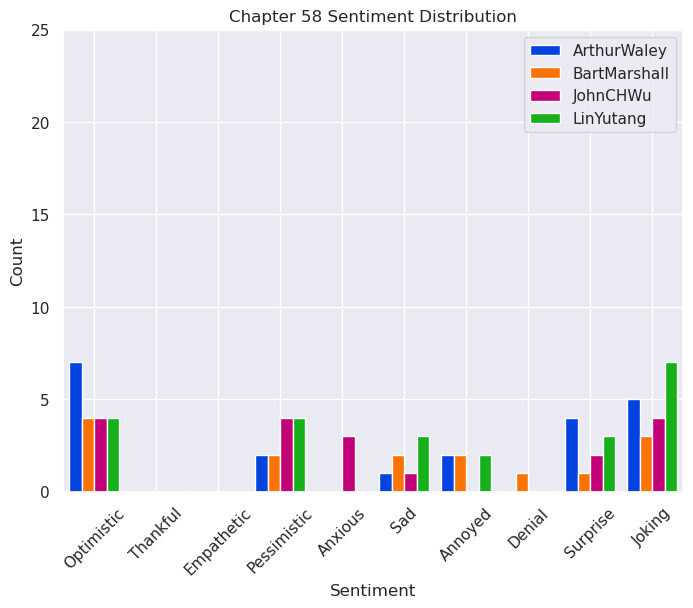

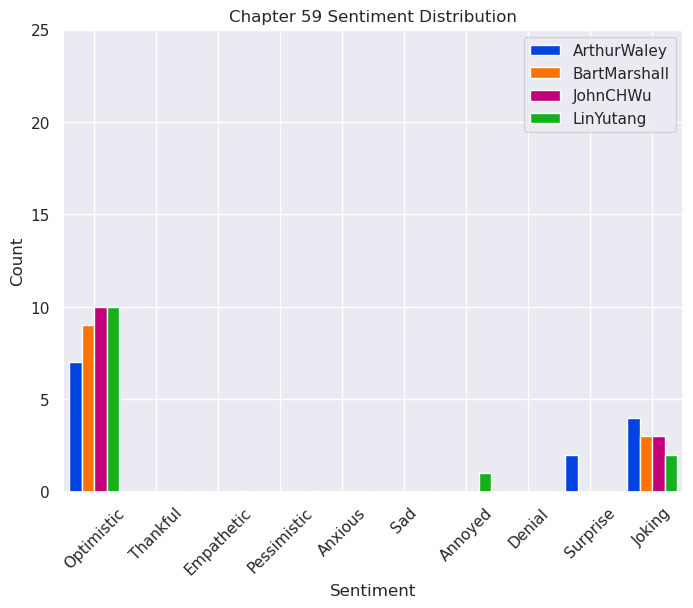

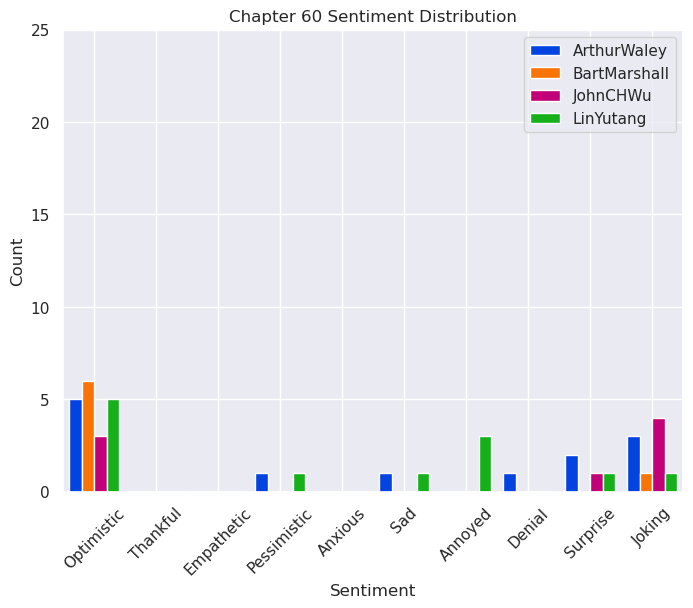

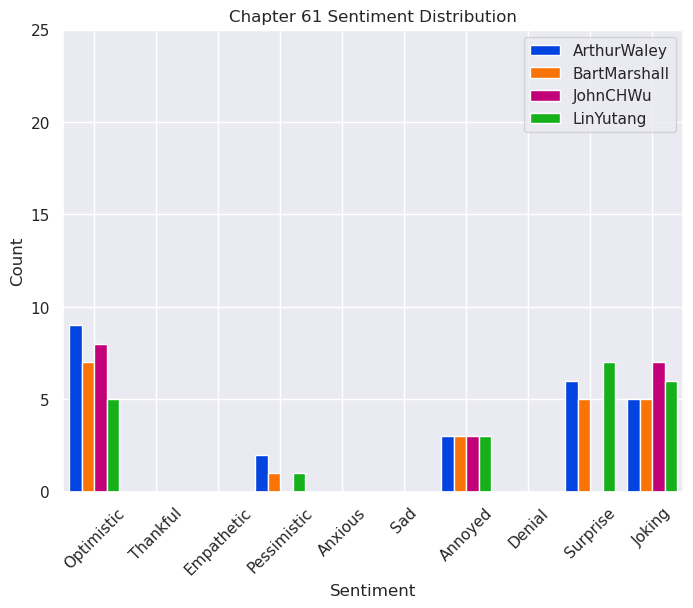

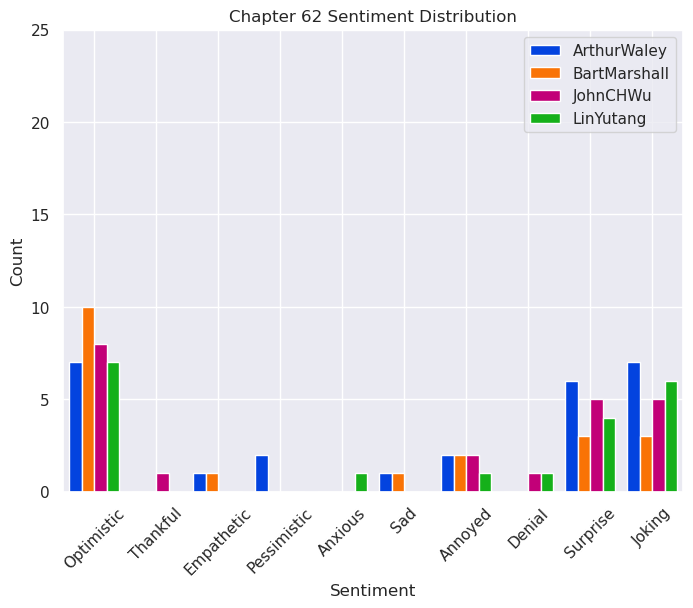

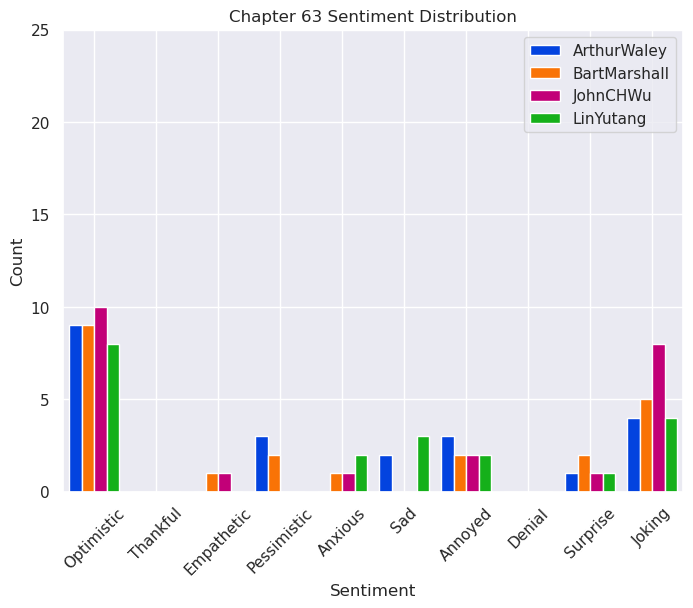

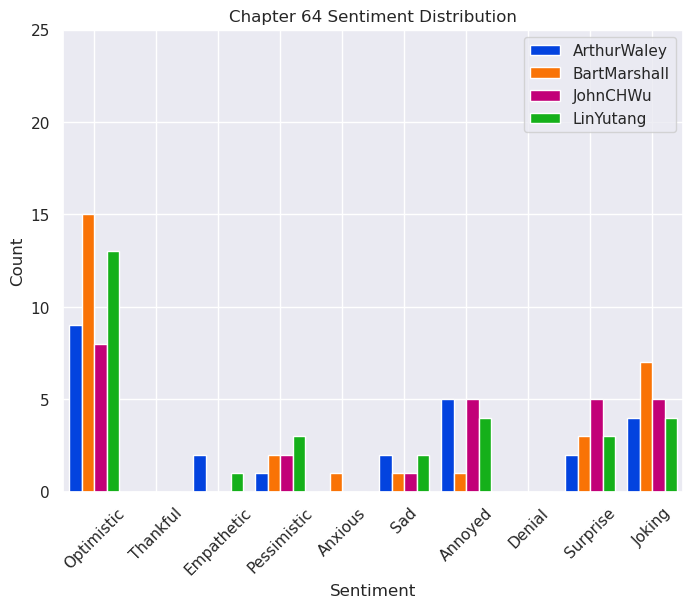

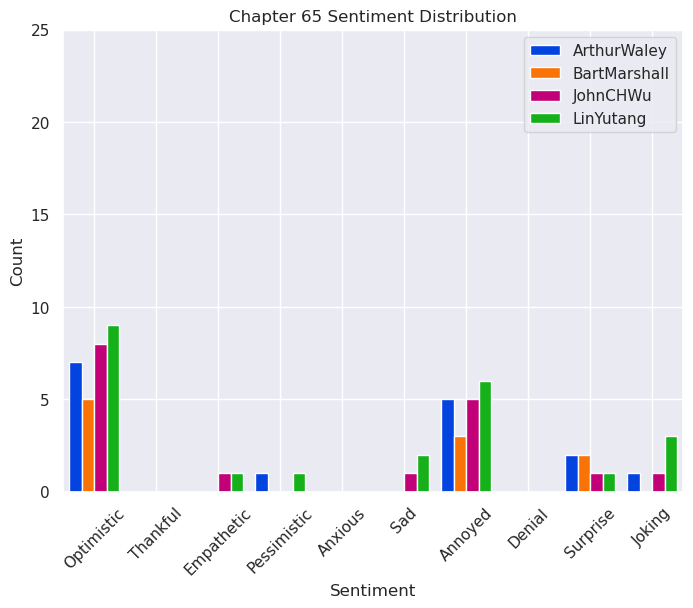

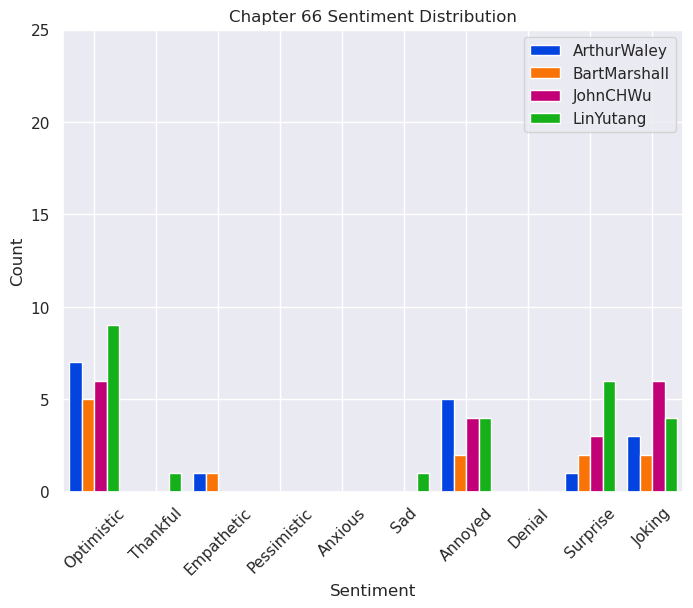

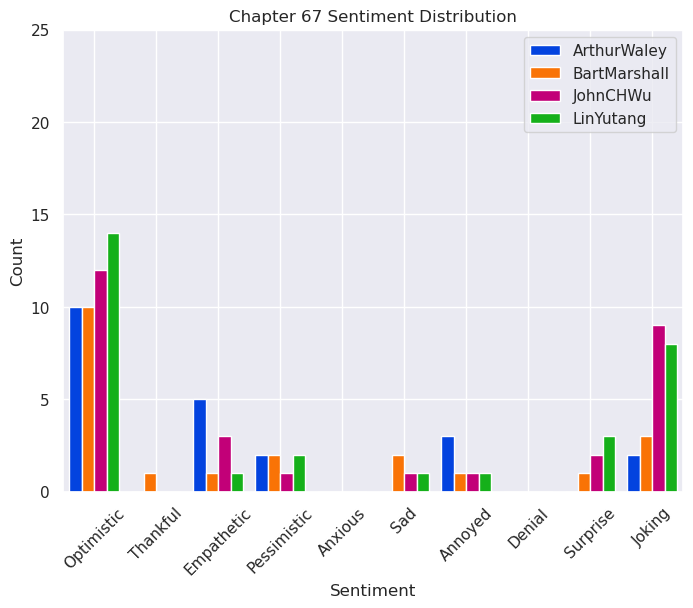

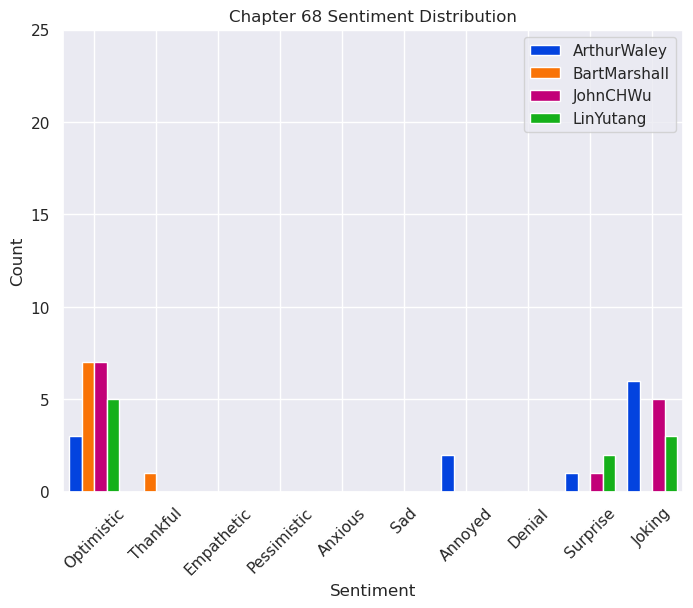

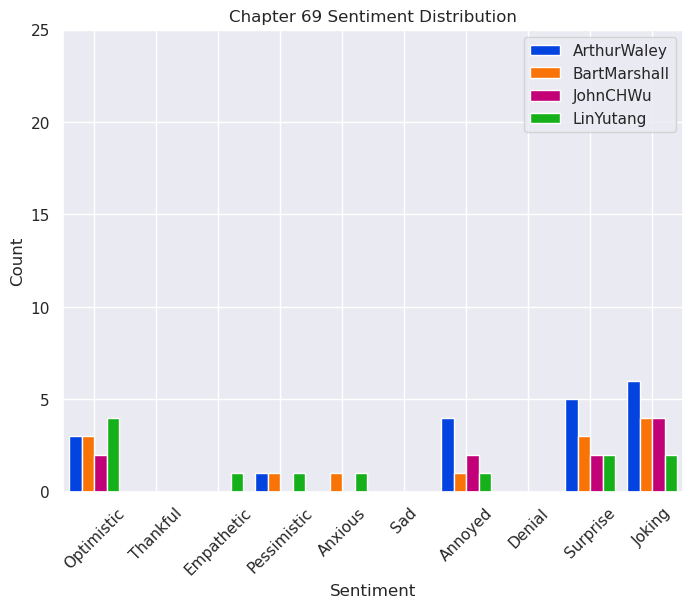

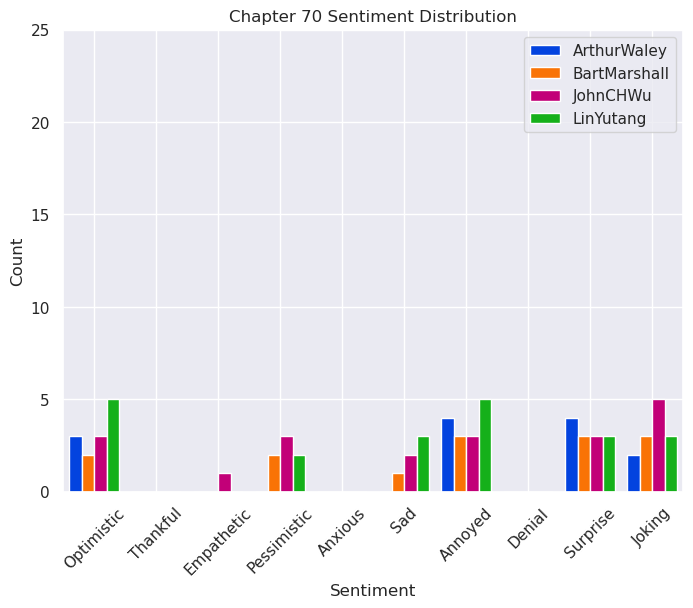

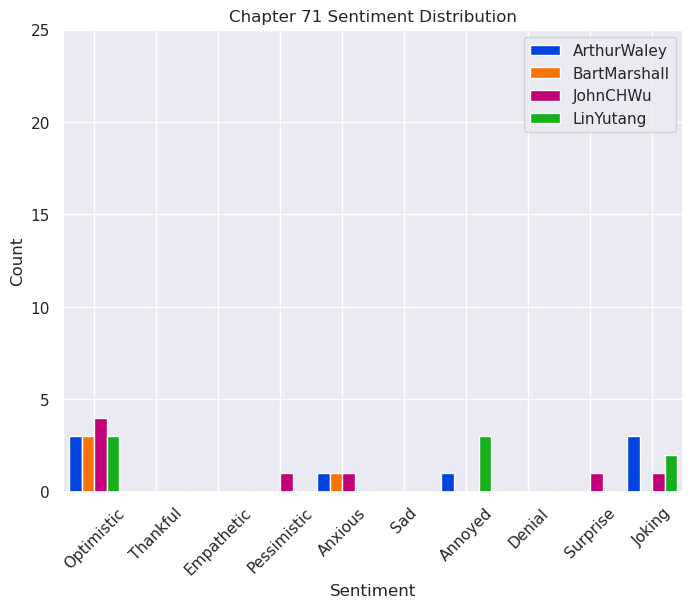

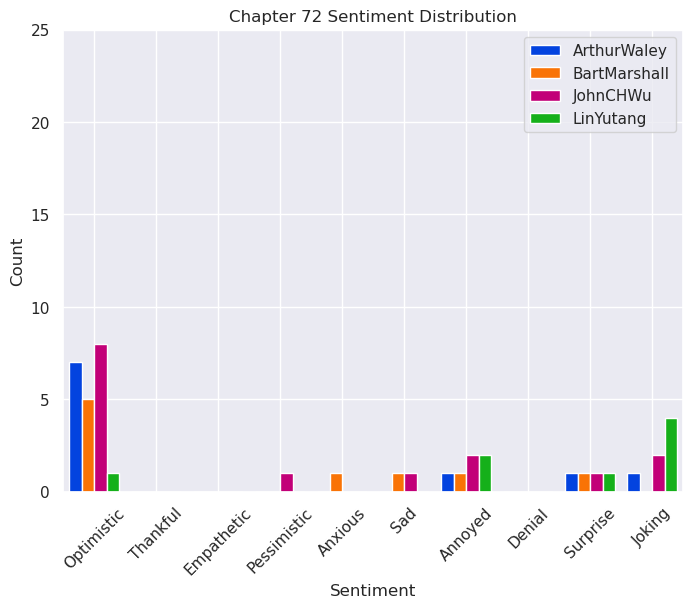

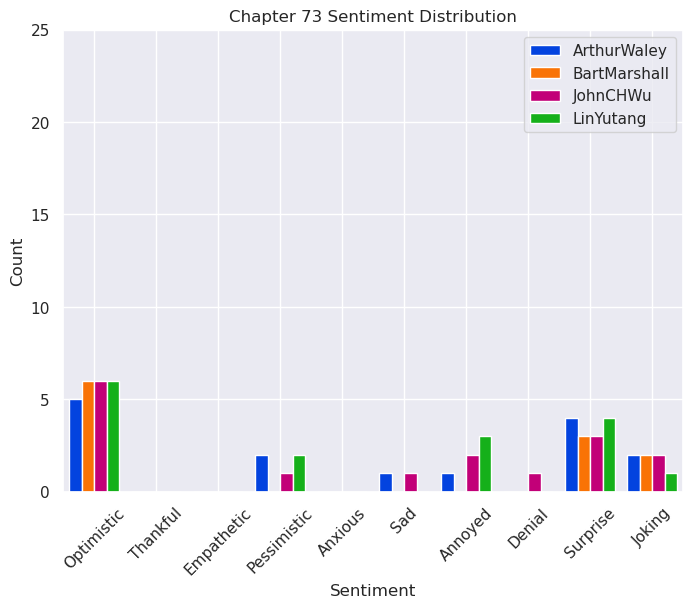

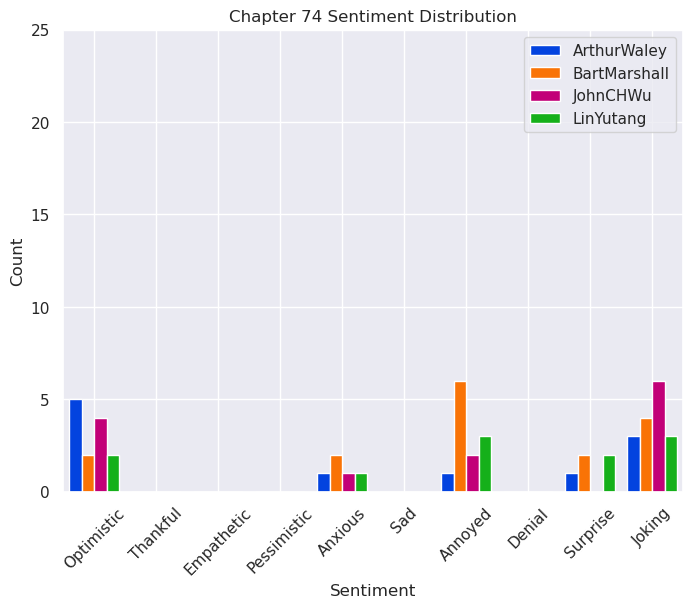

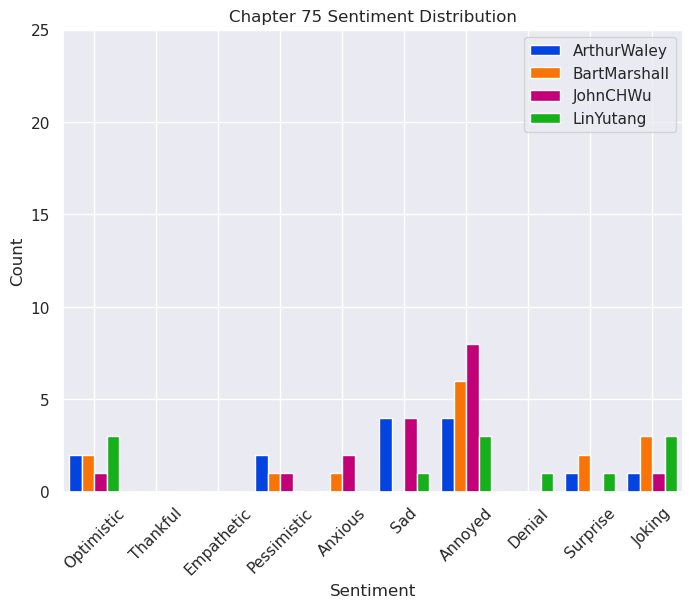

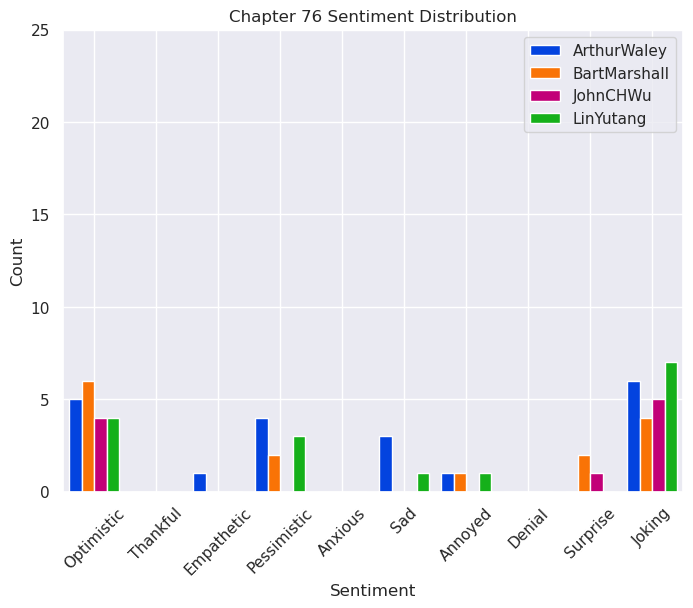

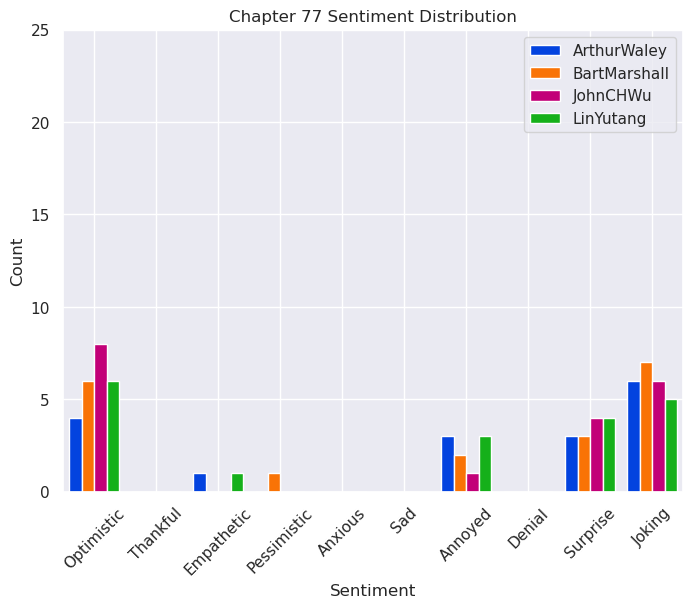

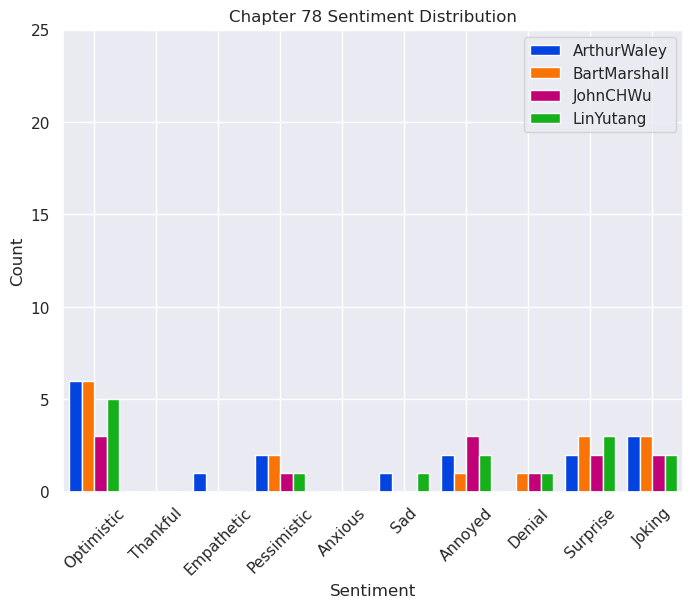

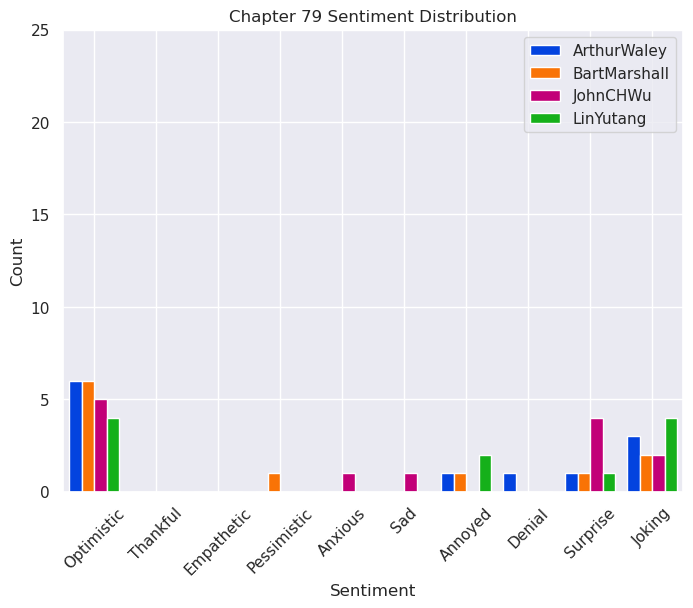

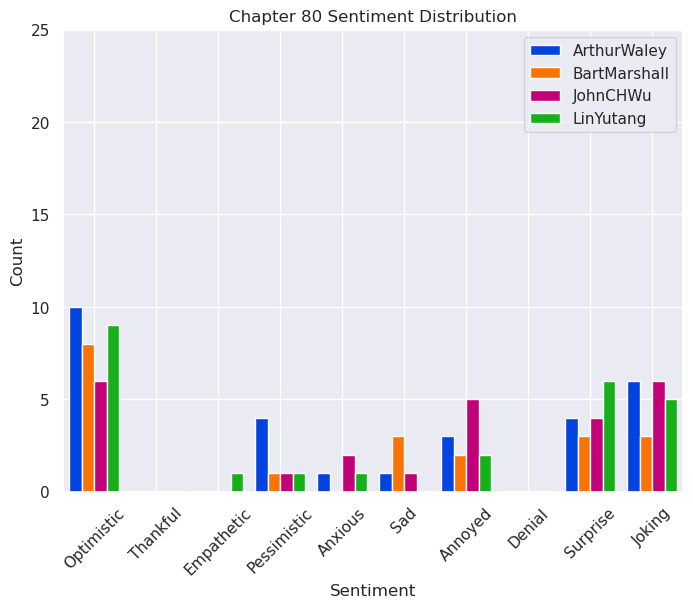

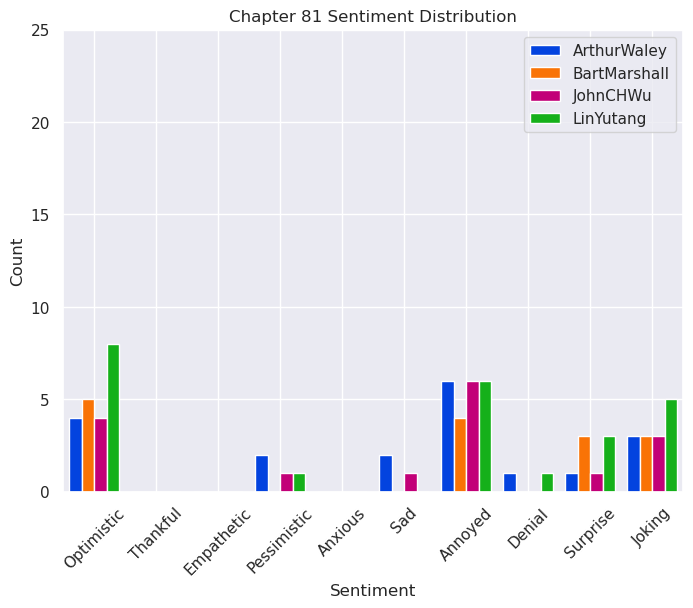

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# set the x-axis label and tick labels
x_label = 'Sentiment'
x_tick_labels = sentiment_labels

# set the y-axis label
y_label = 'Count'

# set the color palette
colors = ["blue", "orange", "magenta", "green"]
myPalette = sns.xkcd_palette(colors)

# get the unique chapters
chapters = data_sets[0]['Chapter'].unique()

# plot the bars for each chapter
for chapter in chapters:
    # create a new figure for this chapter
    fig, ax = plt.subplots(figsize=(8, 6))

    # set the title of the plot
    ax.set_title(f'Chapter {chapter} Sentiment Distribution')

    # get the sentiment counts for each data set for this chapter
    data_set_sentiments = []
    for data_set in data_sets:
        data_set_sentiments.append(data_set[data_set["Chapter"] == chapter][sentiment_labels].sum().tolist())

    # set the position and width of the bars
    bar_width = 0.2
    bar_positions = np.arange(len(sentiment_labels))
    bar_offsets = [-0.3, -0.1, 0.1, 0.3]

    # plot the bars for each data set
    for j in range(len(data_set_names)):
        bar_values = data_set_sentiments[j]
        ax.bar(bar_positions + bar_offsets[j], bar_values, bar_width, color=myPalette[j], label=data_set_names[j])

    # set the x-axis tick labels and tick positions
    ax.set_xticks(bar_positions)
    ax.set_xticklabels(x_tick_labels, rotation=45)

    # add legend and axis labels
    ax.legend(loc='best')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

    # adjust the spacing between bars and add grid lines
    ax.set_axisbelow(True)
    ax.yaxis.grid(True)
    ax.set_xlim(-0.5, len(sentiment_labels) - 0.5)
    ax.set_ylim(0, 25)

    # save the plot for this chapter
    fig_name = f'chapter_{chapter}_sentiment_distribution.png'
    fig_path = f'./Plots/{fig_name}'
    plt.savefig(fig_path)

    # display the plot
    plt.show()

<Figure size 1000x1000 with 0 Axes>

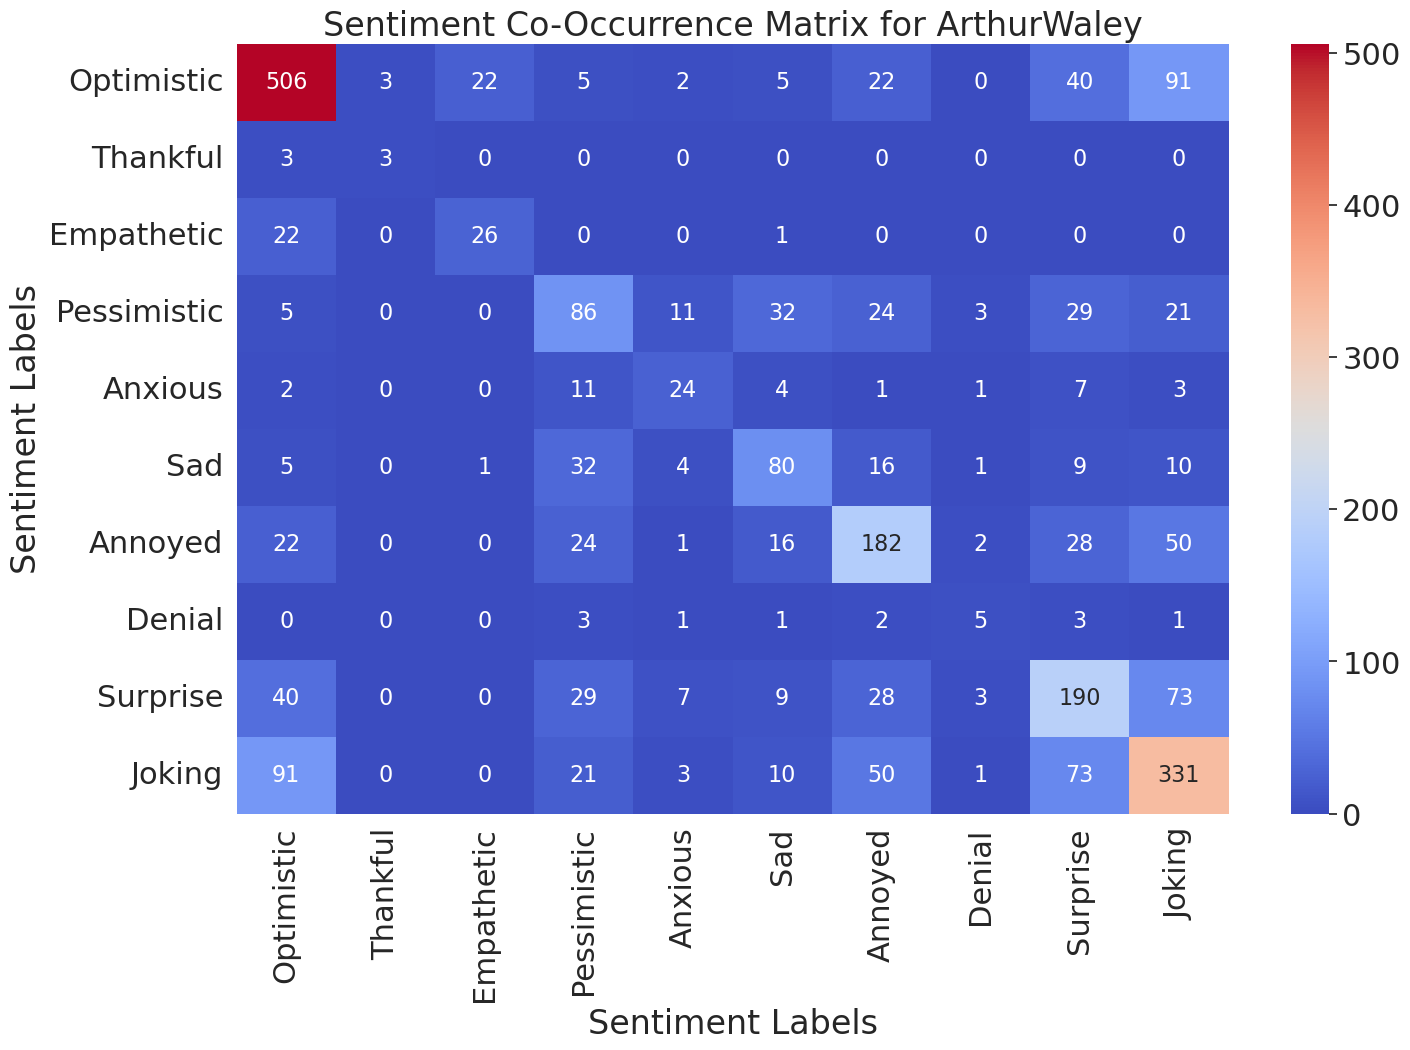

<Figure size 1170x827 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

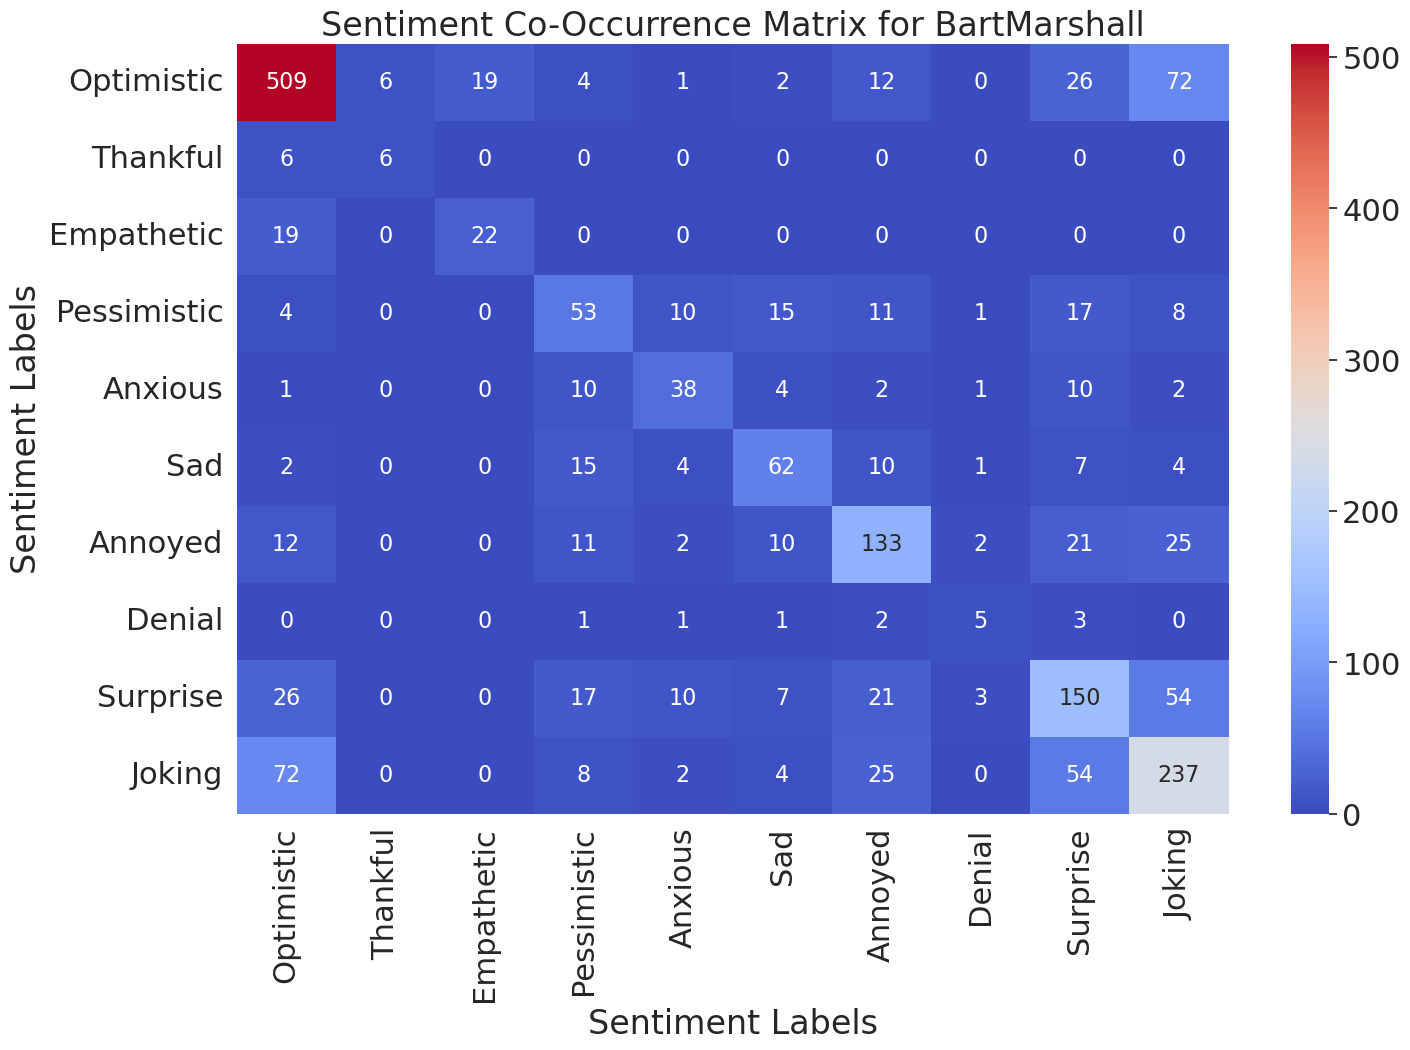

<Figure size 1170x827 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

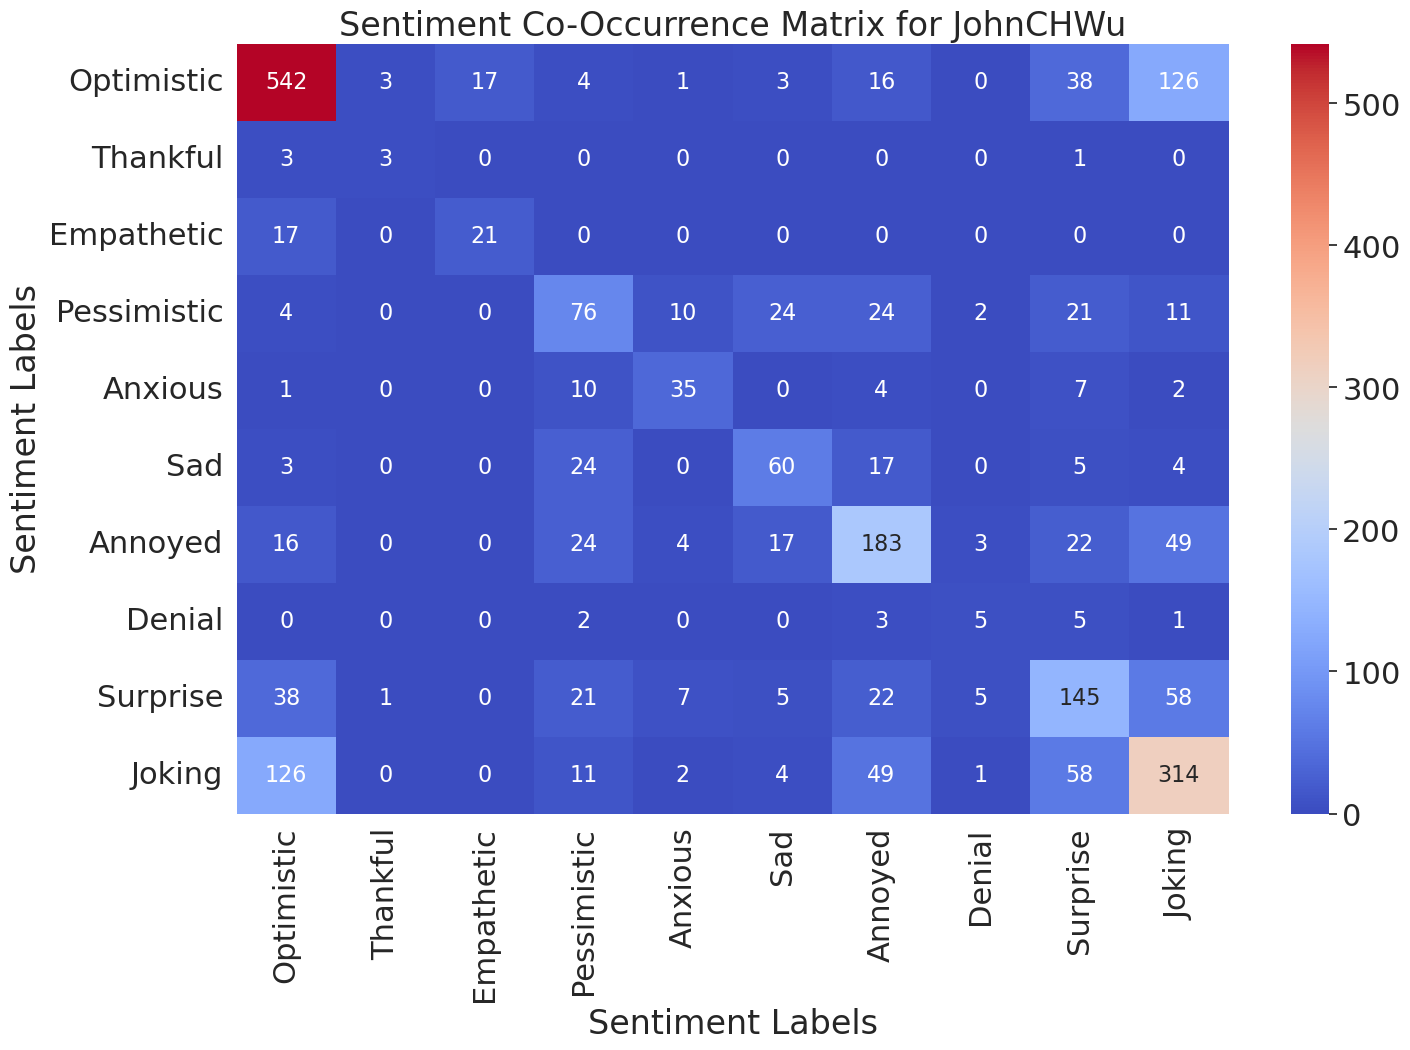

<Figure size 1170x827 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

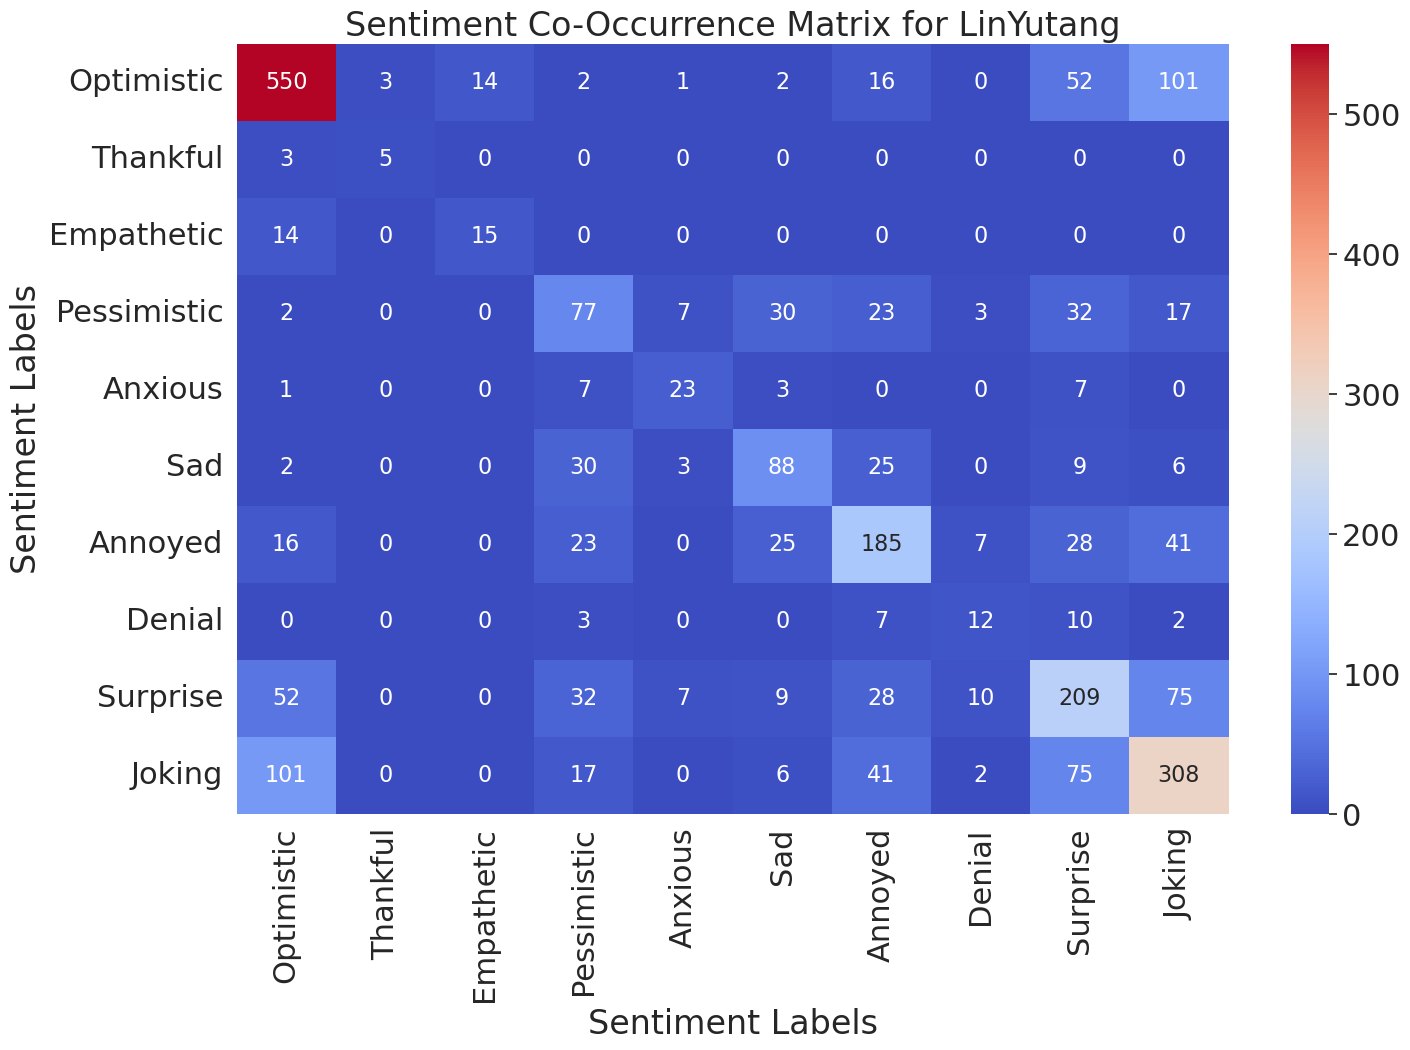

<Figure size 1170x827 with 0 Axes>

In [73]:
for i, data_set in enumerate(data_sets):
    data_set_name = data_set_names[i]

    # create a new DataFrame with only the sentiment labels
    sentiments_df = data_set[sentiment_labels]

    # create the co-occurrence matrix for the sentiments
    co_occurrence = sentiments_df.T.dot(sentiments_df)

    # set the plot size
    plt.figure(figsize=(10,10))

    # create the heatmap using seaborn
    fig = plt.figure(figsize = (16, 10))
    sns.set(font_scale=2)
    sns.heatmap(co_occurrence, annot = True, cmap = 'coolwarm', xticklabels = co_occurrence.columns, yticklabels = co_occurrence.columns,
                fmt = 'g', annot_kws = {"size" : 16})

    # add title and axis labels
    plt.title(f'Sentiment Co-Occurrence Matrix for {data_set_name}')
    plt.xlabel('Sentiment Labels')
    plt.ylabel('Sentiment Labels')


    # show the plot
    plt.show()

    # save the plot
    fig_name = f'{data_set_name}_sentiment_co_occurrence_matrix.png'
    fig_path = f'./Plots/{fig_name}'
    plt.savefig(fig_path)



/tmp/ipykernel_1132/3034127683.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_polarity = df_polarity.append({'Dataset': data_set_names[i], 'Chapter': chapter, 'Polarity': polarity}, ignore_index=True)
/tmp/ipykernel_1132/3034127683.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_polarity = df_polarity.append({'Dataset': data_set_names[i], 'Chapter': chapter, 'Polarity': polarity}, ignore_index=True)
/tmp/ipykernel_1132/3034127683.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_polarity = df_polarity.append({'Dataset': data_set_names[i], 'Chapter': chapter, 'Polarity': polarity}, ignore_index=True)
/tmp/ipykernel_1132/3034127683.py:52: FutureWarning: The frame.append method is deprecated and will be 

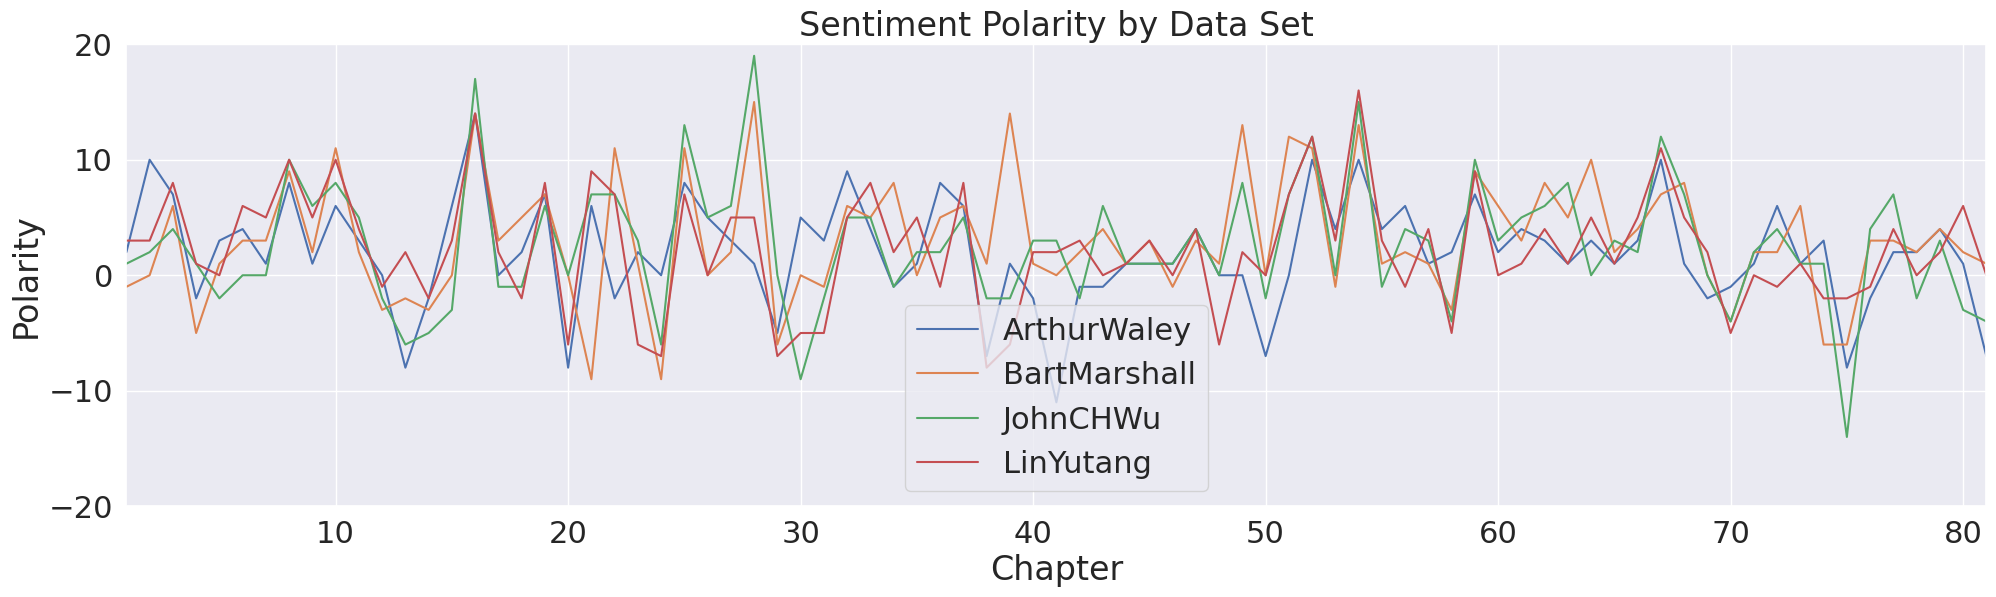

<Figure size 1170x827 with 0 Axes>

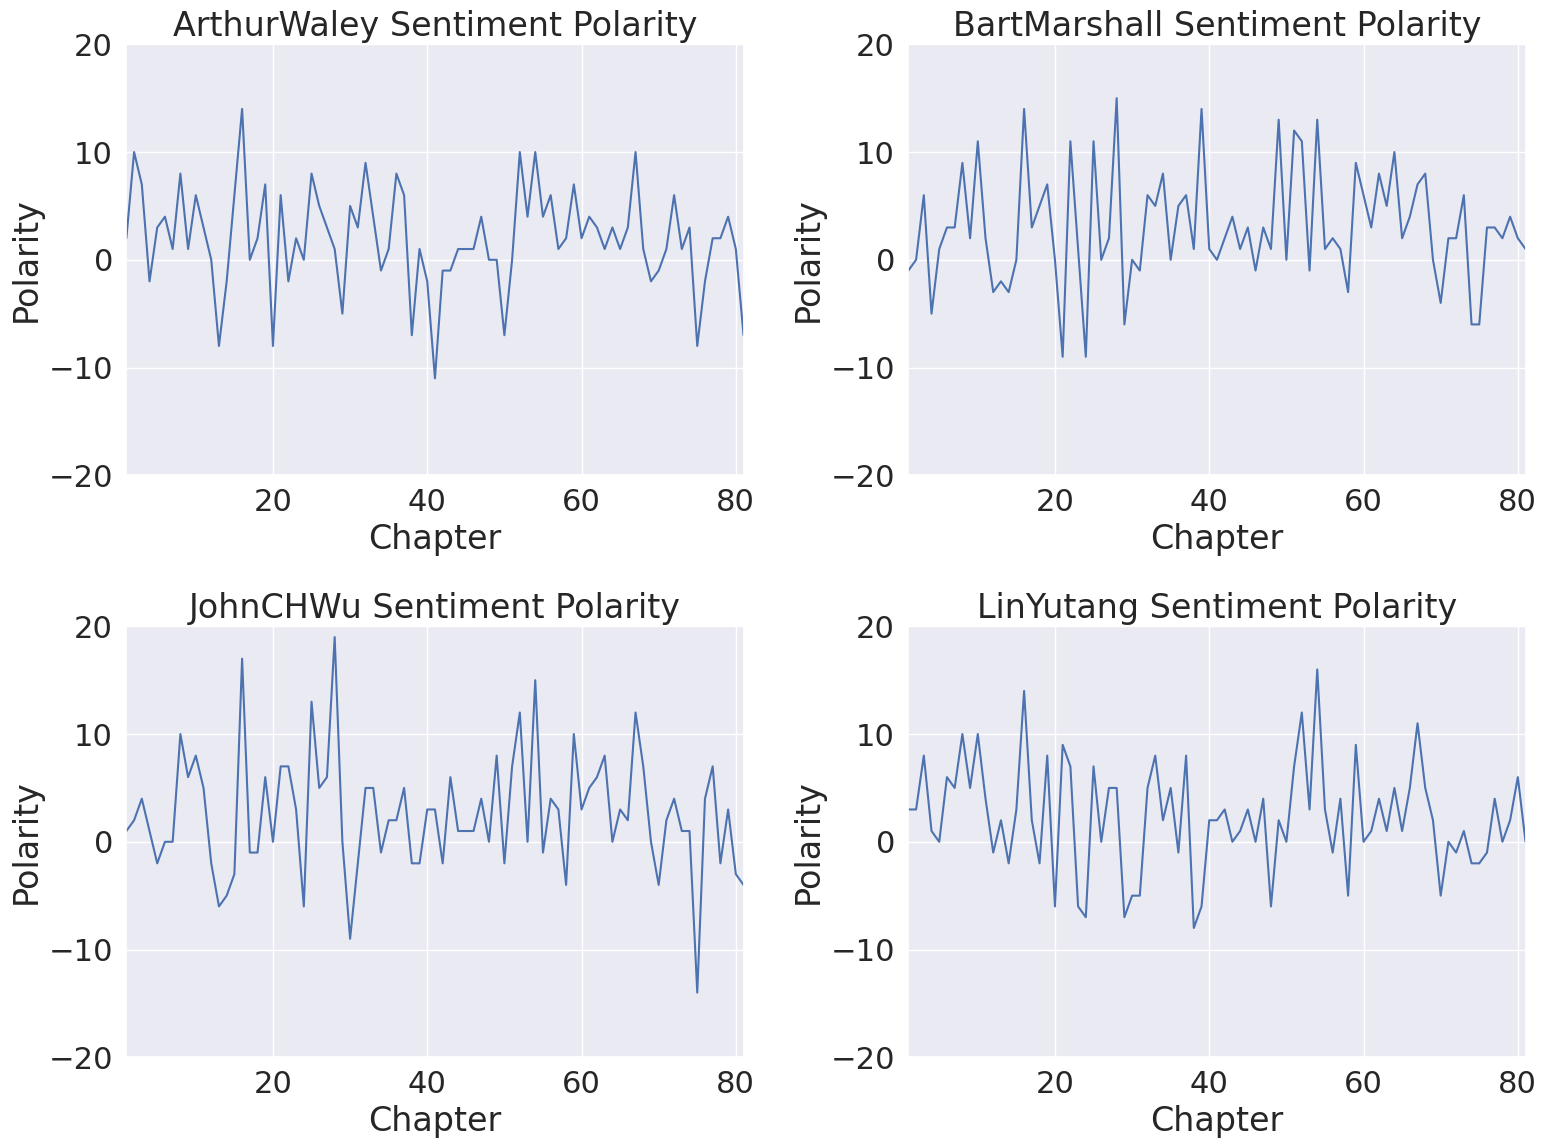

<Figure size 1170x827 with 0 Axes>

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

df_polarity = pd.DataFrame(columns=['Dataset', 'Chapter', 'Polarity'])

for i, data_set in enumerate(data_sets):
    for chapter in chapters:
        polarity = 0
        count = 0
        chapter_df = data_set[data_set['Chapter'] == chapter]
        for index, row in chapter_df.iterrows():
            if row['Optimistic'] == 1 :
                count += 1
                polarity += 1

            if row['Thankful'] == 1 :
                count += 1
                polarity += 1

            if row['Empathetic'] == 1 :
                count += 1
                polarity += 1

            if row['Denial'] == 1 :
                count += 1
                polarity -= 1

            if row['Annoyed'] == 1 :
                count += 1
                polarity -= 1

            if row['Sad'] == 1 :
                count += 1
                polarity -= 1

            if row['Anxious'] == 1 :
                count += 1
                polarity -= 1

            if row['Pessimistic'] == 1 :
                count += 1
                polarity -= 1

            if row['Joking'] == 1 :
                count += 1
                polarity += 0

            if row['Surprise'] == 1 :
                count += 1
                polarity += 0

        df_polarity = df_polarity.append({'Dataset': data_set_names[i], 'Chapter': chapter, 'Polarity': polarity}, ignore_index=True)


# visualize the polarity per data_set
fig, ax = plt.subplots(figsize=(24, 6))

for data_set_name in data_set_names:
    sns.lineplot(x='Chapter', y='Polarity', data=df_polarity[df_polarity['Dataset'] == data_set_name], ax=ax, label=data_set_name)

# set the plot title and axis labels
ax.set_title('Sentiment Polarity by Data Set')
ax.set_xlabel('Chapter')
ax.set_ylabel('Polarity')
ax.set_ylim(-20, 20)
ax.set_xlim(1, 81)

# show the plot
plt.show()

#save the plot
fig_name = f'polarity_by_data_set.png'
fig_path = f'./Plots/{fig_name}'
plt.savefig(fig_path)



# create four subplots, one for each data set
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# loop over the subplots and data sets
for i, ax in enumerate(axs.flat):
    data_set_name = data_set_names[i]
    # plot the polarity scores for the current data set
    sns.lineplot(x='Chapter', y='Polarity', data=df_polarity[df_polarity['Dataset'] == data_set_name], ax=ax)
    # set the plot title and axis labels
    ax.set_title(f'{data_set_name} Sentiment Polarity')
    ax.set_xlabel('Chapter')
    ax.set_ylabel('Polarity')
    ax.set_ylim(-20, 20)
    ax.set_xlim(1, 81)

# adjust the spacing between subplots
fig.tight_layout()

# show the plot
plt.show()

# save the plot
fig_name = f'polarity_by_data_set_subplots.png'
fig_path = f'./Plots/{fig_name}'
plt.savefig(fig_path)